In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from pathlib import Path
root=Path("data")
root.mkdir(exist_ok=True)
path = root / "Sleep_Health_and_Lifestyle_Dataset.csv"

In [3]:
data=pd.read_csv(path)
dataa

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0           126/83          77         4200             No  
1           125/80          75        10000             No  
2           125/80          75        10000             No  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

In [4]:
data.columns = data.columns.str.replace(' ', '_')
data

Person_ID  Gender  Age            Occupation  Sleep_Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality_of_Sleep  Physical_Activity_Level  Stress_Level BMI_Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood_Pressure  Heart_Rate  Daily_Steps Sleep_Disorder  
0           126/83          77         4200             No  
1           125/80          75        10000             No  
2           125/80          75        10000             No  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

In [5]:
data.isnull().sum()

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [6]:
def plot_hist(data, bins=20, shrink=0.8, fig_size=(6, 3)):
    plt.figure(figsize=fig_size)   
    sns.histplot(data, bins=bins, shrink=shrink)    
    plt.xlabel(data.name)
    plt.ylabel("Count")
    plt.title(f"{data.name} Distribution")
    plt.show()

## Analysis  and Fix data

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Gender

In [8]:
data.groupby('Gender')['Gender'].unique() 

Gender
Female    [Female]
Male        [Male]
Name: Gender, dtype: object

In [9]:
len(data.groupby('Gender')['Gender'].unique())

2

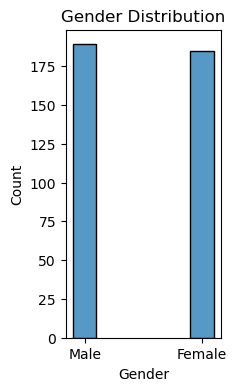

In [10]:
plot_hist(data["Gender"],bins=2,shrink=0.2,fig_size=(2, 4))

<Axes: xlabel='Gender', ylabel='Age'>

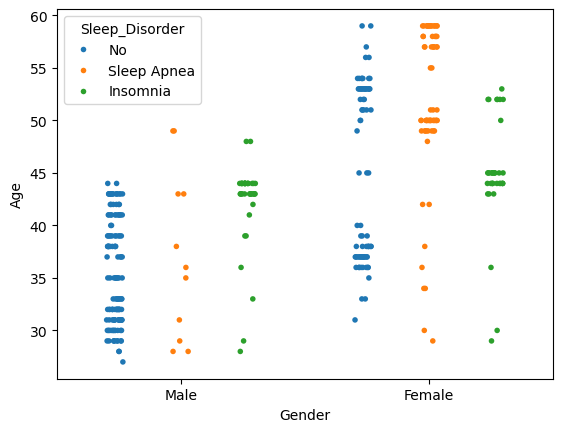

In [11]:
sns.stripplot(data=data,x="Gender",y='Age',hue="Sleep_Disorder",dodge=True,size=4)

<Axes: xlabel='Gender', ylabel='count'>

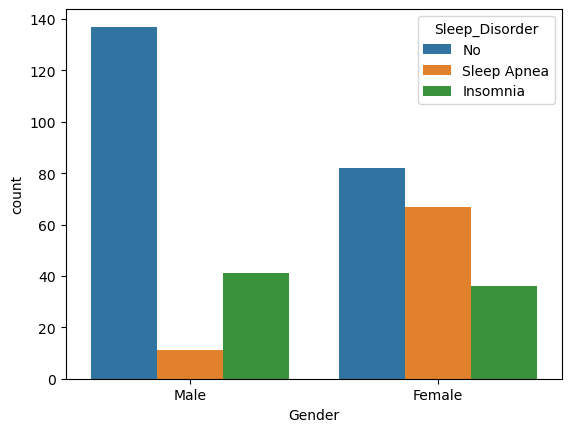

In [12]:
sns.countplot(data=data, x="Gender", hue="Sleep_Disorder")

In [13]:
lab=LabelEncoder()

In [14]:
data['Gender']=lab.fit_transform(data['Gender'])

Text(0.5, 1.0, 'Gender vs Sleep_Disorder')

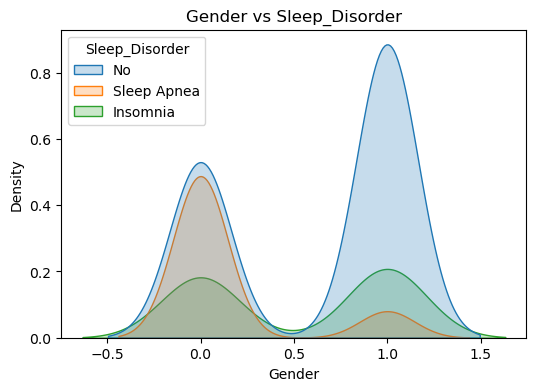

In [15]:
plt.figure(figsize=(6,4))
sns.kdeplot(
        data=data,
        x='Gender',
        hue='Sleep_Disorder',
        fill=True)
plt.title("Gender vs Sleep_Disorder") 

In [16]:
data

Person_ID  Gender  Age            Occupation  Sleep_Duration  \
0            1       1   27     Software Engineer             6.1   
1            2       1   28                Doctor             6.2   
2            3       1   28                Doctor             6.2   
3            4       1   28  Sales Representative             5.9   
4            5       1   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370       0   59                 Nurse             8.1   
370        371       0   59                 Nurse             8.0   
371        372       0   59                 Nurse             8.1   
372        373       0   59                 Nurse             8.1   
373        374       0   59                 Nurse             8.1   

     Quality_of_Sleep  Physical_Activity_Level  Stress_Level BMI_Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood_Pressure  Heart_Rate  Daily_Steps Sleep_Disorder  
0           126/83          77         4200             No  
1           125/80          75        10000             No  
2           125/80          75        10000             No  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

### Age

In [17]:
print("len:", len(data.groupby('Age')['Age'].count()))
data.groupby('Age')['Age'].count()

len: 31


Age
27     1
28     5
29    13
30    13
31    18
32    17
33    13
34     2
35    12
36    12
37    20
38    20
39    15
40     4
41    12
42     9
43    34
44    30
45    14
48     3
49    11
50    20
51     8
52     9
53    17
54     7
55     2
56     2
57     9
58     6
59    16
Name: Age, dtype: int64

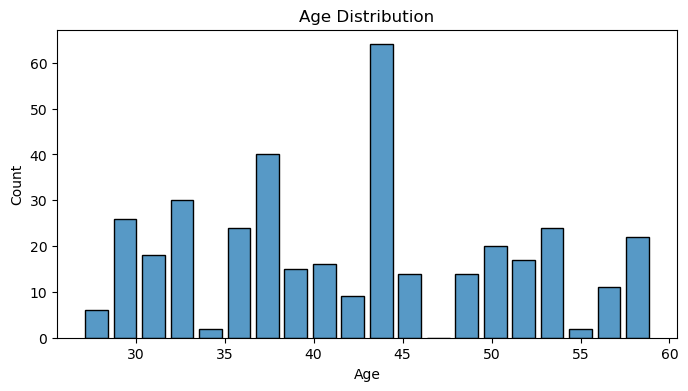

In [18]:
plot_hist(data["Age"],bins=20,shrink=0.8,fig_size=(8,4))

Text(0.5, 1.0, 'Age vs Sleep_Disorder')

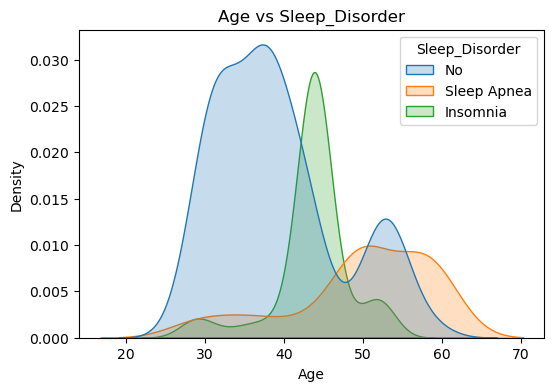

In [19]:
plt.figure(figsize=(6,4))
sns.kdeplot(
        data=data,
        x='Age',
        hue='Sleep_Disorder',
        fill=True
    )
plt.title("Age vs Sleep_Disorder")

### Occupation

In [20]:
print("len:", len(data.groupby('Occupation')['Occupation'].count()))
data.groupby('Occupation')['Occupation'].count()

len: 11


Occupation
Accountant              37
Doctor                  71
Engineer                63
Lawyer                  47
Manager                  1
Nurse                   73
Sales Representative     2
Salesperson             32
Scientist                4
Software Engineer        4
Teacher                 40
Name: Occupation, dtype: int64

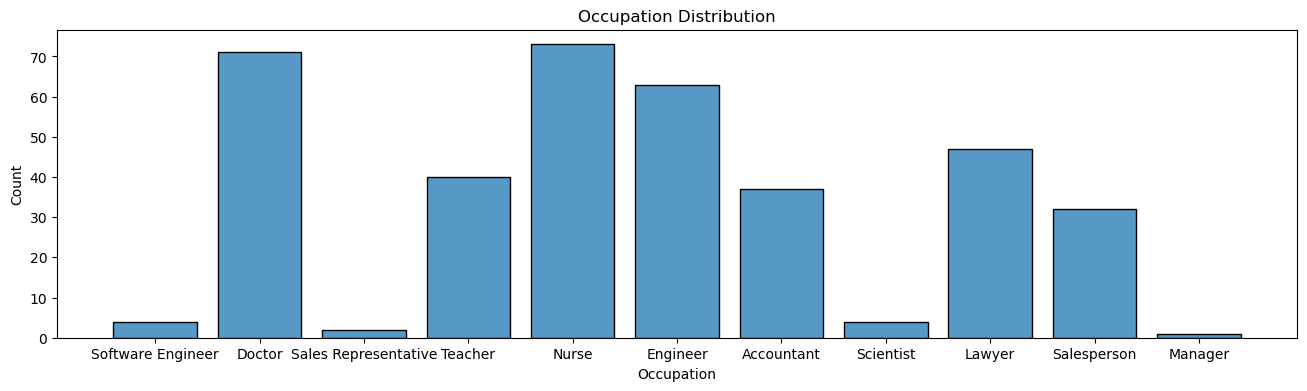

In [21]:
plot_hist(data["Occupation"],bins=11,shrink=0.8,fig_size=(16,4))

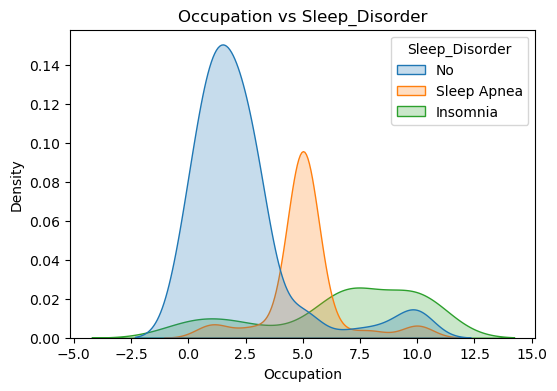

In [22]:
test_before = data[['Occupation', 'Sleep_Disorder']].copy()
test_before['Occupation'] = lab.fit_transform(test_before['Occupation'])

plt.figure(figsize=(6,4))
sns.kdeplot(
    data=test_before,
    x='Occupation',
    hue='Sleep_Disorder',
    fill=True
)
plt.title("Occupation vs Sleep_Disorder")
plt.show()

In [23]:
test_before = data[['Occupation', 'Sleep_Disorder']].copy()
test_dumy = pd.get_dummies(test_before['Occupation'],dtype=int)
test_before = pd.concat([test_dumy, test_before.drop(columns='Occupation')],axis=1)

In [24]:
test_before

Accountant  Doctor  Engineer  Lawyer  Manager  Nurse  \
0             0       0         0       0        0      0   
1             0       1         0       0        0      0   
2             0       1         0       0        0      0   
3             0       0         0       0        0      0   
4             0       0         0       0        0      0   
..          ...     ...       ...     ...      ...    ...   
369           0       0         0       0        0      1   
370           0       0         0       0        0      1   
371           0       0         0       0        0      1   
372           0       0         0       0        0      1   
373           0       0         0       0        0      1   

     Sales Representative  Salesperson  Scientist  Software Engineer  Teacher  \
0                       0            0          0                  1        0   
1                       0            0          0                  0        0   
2                       0            0          0                  0        0   
3                       1            0          0                  0        0   
4                       1            0          0                  0        0   
..                    ...          ...        ...                ...      ...   
369                     0            0          0                  0        0   
370                     0            0          0                  0        0   
371                     0            0          0                  0        0   
372                     0            0          0                  0        0   
373                     0            0          0                  0        0   

    Sleep_Disorder  
0               No  
1               No  
2               No  
3      Sleep Apnea  
4      Sleep Apnea  
..             ...  
369    Sleep Apnea  
370    Sleep Apnea  
371    Sleep Apnea  
372    Sleep Apnea  
373    Sleep Apnea  

[374 rows x 12 columns]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14848\3343654911.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


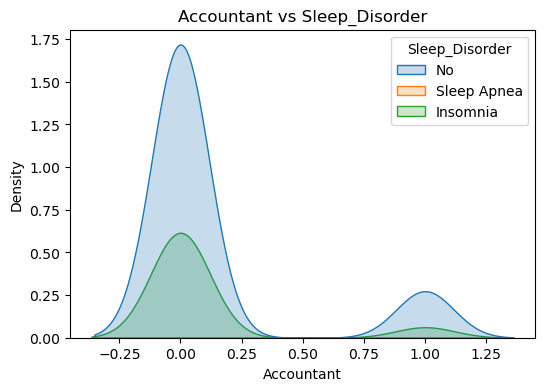

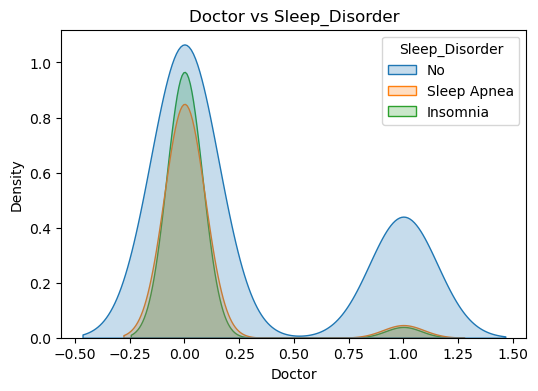

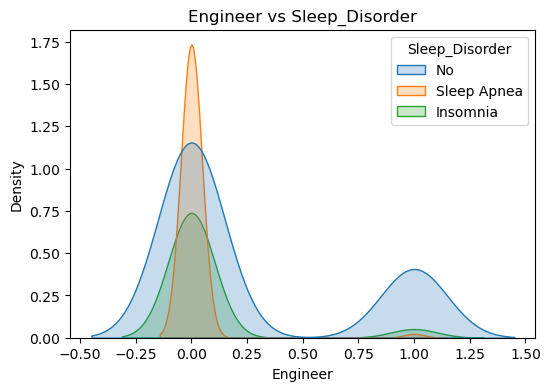

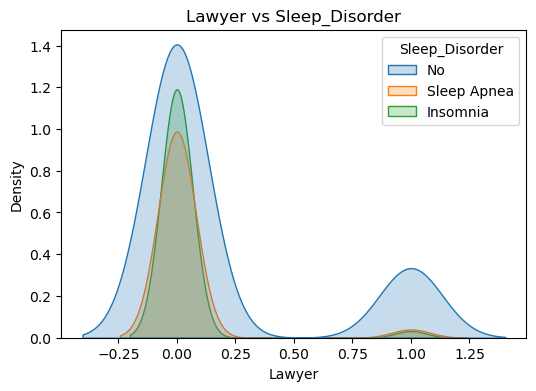

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14848\3343654911.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


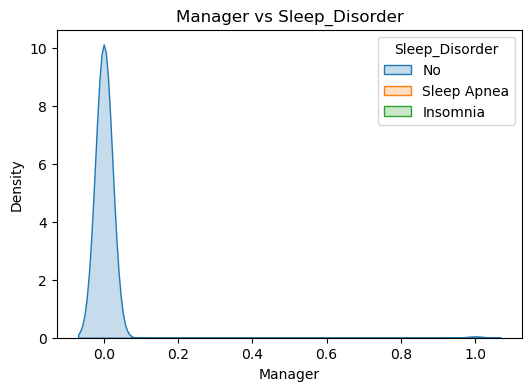

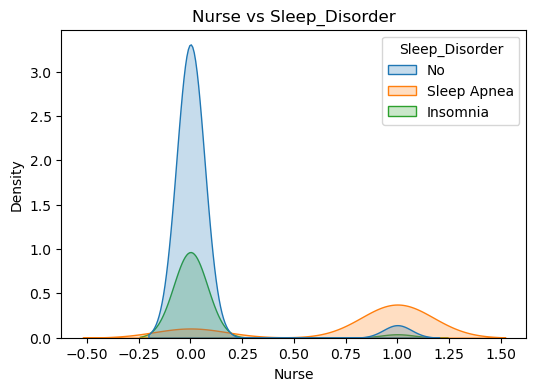

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14848\3343654911.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


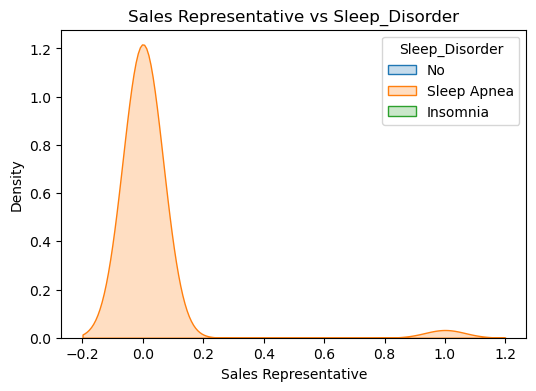

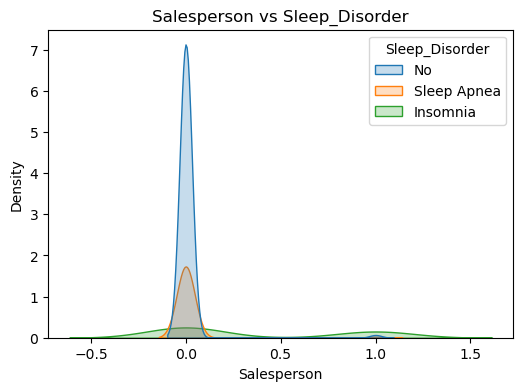

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14848\3343654911.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


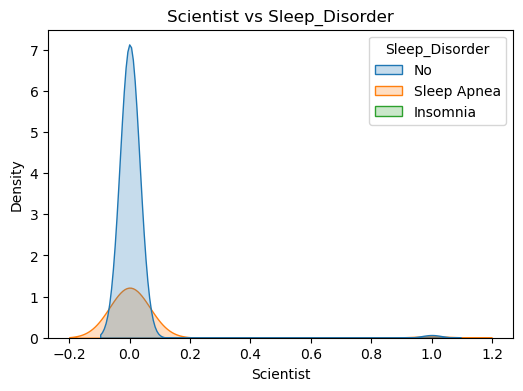

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14848\3343654911.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


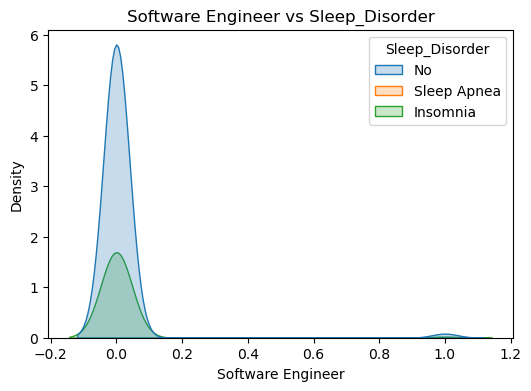

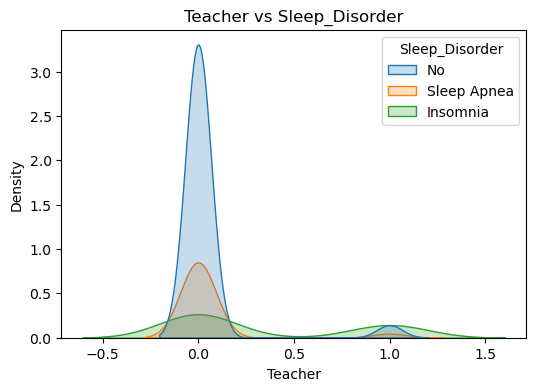

In [25]:
for col in test_before.columns:
    if col == 'Sleep_Disorder':
        continue

    plt.figure(figsize=(6,4))
    sns.kdeplot(
        data=test_before,
        x=col,
        hue='Sleep_Disorder',
        fill=True
    )
    plt.title(f"{col} vs Sleep_Disorder")
    plt.show()


fix

In [26]:
jobs_by_domain = {

    "healthcare_life_sciences": [
        "doctor", "medical doctor", "physician", "general doctor",
        "surgeon", "specialist doctor",
        "nurse", "staff nurse", "registered nurse", "nursing officer",
        "nurse practitioner", "midwife",
        "medical officer",
        "pharmacist", "medical pharmacist",
        "dentist", "dental surgeon",
        "veterinarian",
        "physiotherapist", "physical therapist",
        "occupational therapist",
        "radiologist", "radiology technician",
        "pathologist", "lab technician", "medical lab technician",
        "anesthesiologist",
        "psychiatrist", "psychologist", "clinical psychologist",
        "biomedical scientist",
        "medical scientist",
        "life scientist",
        "clinical researcher", "medical researcher",
        "epidemiologist",
        "public health officer",
        "biologist", "microbiologist",
        "geneticist", "bioinformatician",
        "medical coder", "medical biller",
        "healthcare manager", "hospital manager",
        "healthcare administrator",
        "medical device engineer",
        "pharmaceutical scientist",
        "health data analyst"
    ],

    "engineering_technology": [
        "engineer", "engineering professional",
        "software engineer", "software developer", "programmer", "coder",
        "computer engineer",
        "backend developer", "frontend developer", "full stack developer",
        "machine learning engineer", "ai engineer",
        "data scientist", "data engineer", "data analyst",
        "research engineer",
        "electrical engineer", "electronics engineer",
        "mechanical engineer",
        "civil engineer",
        "aerospace engineer",
        "robotics engineer",
        "embedded engineer", "embedded systems engineer",
        "devops engineer", "site reliability engineer",
        "cloud engineer",
        "cybersecurity engineer", "security analyst",
        "network engineer",
        "systems engineer",
        "it engineer", "it specialist",
        "game developer",
        "blockchain engineer",
        "firmware engineer",
        "qa engineer", "test engineer",
        "engineering manager",
        "technical lead",
        "cto", "chief technology officer"
    ],

    "education_research": [
        "teacher", "school teacher", "high school teacher",
        "lecturer",
        "professor", "assistant professor", "associate professor",
        "tutor", "private tutor",
        "educator",
        "researcher", "scientist", "research scientist",
        "academic researcher",
        "phd researcher", "doctoral scholar",
        "postdoctoral researcher",
        "educationist",
        "curriculum developer",
        "instructional designer",
        "education consultant",
        "special education teacher",
        "teaching assistant",
        "online educator",
        "edtech specialist",
        "academic coordinator",
        "school principal",
        "dean",
        "education policy analyst"
    ],

    "business_finance_administration": [
        "accountant", "senior accountant",
        "chartered accountant",
        "finance professional",
        "financial analyst",
        "investment analyst",
        "business analyst",
        "business manager",
        "operations manager",
        "general manager",
        "manager",
        "project manager",
        "program manager",
        "product manager",
        "management consultant",
        "auditor",
        "risk analyst",
        "economist",
        "hr manager", "human resources manager",
        "hr executive", "recruiter",
        "payroll officer",
        "office administrator",
        "administrative officer",
        "corporate manager",
        "strategy manager",
        "compliance officer",
        "chief financial officer",
        "chief operating officer"
    ],

    "legal_governance": [
        "lawyer", "advocate", "attorney",
        "legal professional",
        "corporate lawyer",
        "criminal lawyer",
        "civil lawyer",
        "legal advisor",
        "legal consultant",
        "judge",
        "magistrate",
        "public prosecutor",
        "legal researcher",
        "law researcher",
        "paralegal",
        "company secretary",
        "compliance manager",
        "policy analyst",
        "government legal officer",
        "intellectual property lawyer",
        "patent lawyer"
    ],

    "sales_marketing_commerce": [
        "salesperson", "sales person",
        "sales representative", "sales executive",
        "sales associate",
        "sales manager",
        "business development executive",
        "business development manager",
        "marketing executive",
        "marketing manager",
        "digital marketer",
        "seo specialist",
        "content marketer",
        "brand manager",
        "product marketing manager",
        "growth marketer",
        "market research analyst",
        "retail salesperson",
        "e-commerce manager",
        "retail manager",
        "merchandising executive",
        "crm executive",
        "customer relationship manager",
        "customer success manager"
    ],

    "transportation_logistics": [
        "logistics executive",
        "logistics manager",
        "supply chain executive",
        "supply chain manager",
        "warehouse supervisor",
        "warehouse manager",
        "inventory controller",
        "procurement officer",
        "fleet manager",
        "transportation coordinator",
        "shipping executive",
        "customs broker",
        "freight forwarder",
        "truck driver",
        "delivery driver",
        "commercial driver",
        "pilot",
        "air traffic controller",
        "railway officer",
        "maritime officer"
    ],

    "construction_infrastructure_skilled_trades": [
        "construction worker",
        "construction engineer",
        "construction manager",
        "site engineer",
        "structural engineer",
        "architect",
        "urban planner",
        "surveyor",
        "quantity surveyor",
        "electrician",
        "plumber",
        "welder",
        "carpenter",
        "mason",
        "hvac technician",
        "heavy equipment operator",
        "safety supervisor",
        "building inspector",
        "facilities manager"
    ],

    "manufacturing_industrial_production": [
        "factory worker",
        "production worker",
        "production engineer",
        "manufacturing engineer",
        "plant manager",
        "operations supervisor",
        "industrial engineer",
        "process engineer",
        "maintenance engineer",
        "quality inspector",
        "quality control engineer",
        "quality assurance manager",
        "machine operator",
        "cnc operator",
        "machinist",
        "automation engineer",
        "robotics technician"
    ],

    "agriculture_natural_resources": [
        "farmer",
        "agricultural worker",
        "agricultural scientist",
        "agronomist",
        "soil scientist",
        "horticulturist",
        "plant scientist",
        "animal scientist",
        "veterinary officer",
        "fisheries officer",
        "forestry officer",
        "environmental scientist",
        "ecologist",
        "geologist",
        "mining engineer",
        "renewable energy expert",
        "sustainability specialist"
    ],

    "arts_media_entertainment_sports": [
        "artist",
        "visual artist",
        "graphic designer",
        "ui designer",
        "ux designer",
        "animator",
        "illustrator",
        "film director",
        "film producer",
        "actor",
        "video editor",
        "journalist",
        "reporter",
        "content creator",
        "influencer",
        "music artist",
        "music producer",
        "sound engineer",
        "sports person",
        "athlete",
        "coach",
        "sports analyst"
    ],

    "public_service_defense": [
        "government officer",
        "civil servant",
        "administrative officer",
        "policy officer",
        "defense scientist",
        "military officer",
        "army officer",
        "navy officer",
        "air force officer",
        "police officer",
        "law enforcement officer",
        "firefighter",
        "security officer",
        "intelligence analyst",
        "cyber defense analyst",
        "public safety officer"
    ],

    "hospitality_tourism_personal_services": [
        "hotel staff",
        "hotel manager",
        "front desk executive",
        "guest relations executive",
        "travel agent",
        "tour guide",
        "event manager",
        "restaurant manager",
        "chef",
        "cook",
        "baker",
        "housekeeping staff",
        "spa therapist",
        "wellness coach",
        "fitness trainer",
        "personal trainer",
        "salon professional"
    ],

    "informal_gig_independent_work": [
        "freelancer",
        "independent worker",
        "self-employed professional",
        "consultant",
        "independent consultant",
        "gig worker",
        "content writer",
        "copywriter",
        "freelance developer",
        "freelance designer",
        "online tutor",
        "youtuber",
        "podcaster",
        "blogger",
        "social media manager",
        "virtual assistant",
        "independent researcher",
        "startup founder",
        "entrepreneur",
        "solopreneur"
    ]
}


In [27]:
def get_job_domain(text, jobs_by_domain=jobs_by_domain):
    text = text.lower()
    for domain, roles in jobs_by_domain.items():
        for role in roles:
            if role in text:
                return domain
    return None

In [28]:
print(get_job_domain("Sales Representative"))

sales_marketing_commerce


In [29]:
print(get_job_domain("Salesperson"))

sales_marketing_commerce


In [30]:
print(get_job_domain("I am a hard working Salesperson"))

sales_marketing_commerce


In [31]:
data["Occupation"]=data["Occupation"].apply(get_job_domain)

In [32]:
data

Person_ID  Gender  Age                Occupation  Sleep_Duration  \
0            1       1   27    engineering_technology             6.1   
1            2       1   28  healthcare_life_sciences             6.2   
2            3       1   28  healthcare_life_sciences             6.2   
3            4       1   28  sales_marketing_commerce             5.9   
4            5       1   28  sales_marketing_commerce             5.9   
..         ...     ...  ...                       ...             ...   
369        370       0   59  healthcare_life_sciences             8.1   
370        371       0   59  healthcare_life_sciences             8.0   
371        372       0   59  healthcare_life_sciences             8.1   
372        373       0   59  healthcare_life_sciences             8.1   
373        374       0   59  healthcare_life_sciences             8.1   

     Quality_of_Sleep  Physical_Activity_Level  Stress_Level BMI_Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood_Pressure  Heart_Rate  Daily_Steps Sleep_Disorder  
0           126/83          77         4200             No  
1           125/80          75        10000             No  
2           125/80          75        10000             No  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

In [33]:
data['Occupation'].isnull().sum()

np.int64(0)

In [34]:
data.groupby('Occupation')['Occupation'].count()

Occupation
business_finance_administration     38
education_research                  44
engineering_technology              67
healthcare_life_sciences           144
legal_governance                    47
sales_marketing_commerce            34
Name: Occupation, dtype: int64

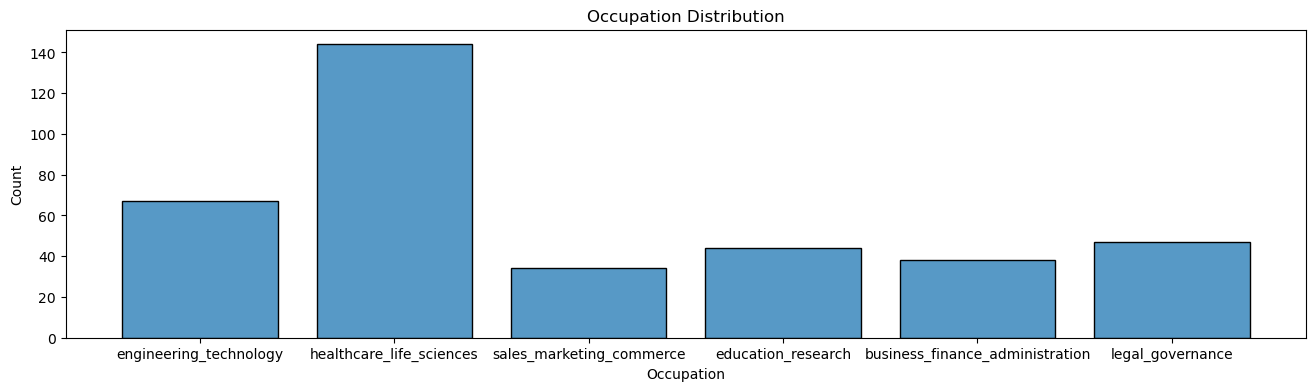

In [35]:
plot_hist(data["Occupation"],bins=11,shrink=0.8,fig_size=(16,4))

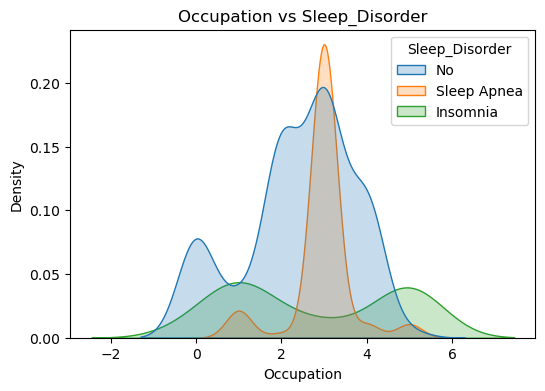

In [36]:
test_before = data[['Occupation', 'Sleep_Disorder']].copy()
test_before['Occupation'] = lab.fit_transform(test_before['Occupation'])

plt.figure(figsize=(6,4))
sns.kdeplot(
    data=test_before,
    x='Occupation',
    hue='Sleep_Disorder',
    fill=True
)
plt.title("Occupation vs Sleep_Disorder")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14848\3507733822.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


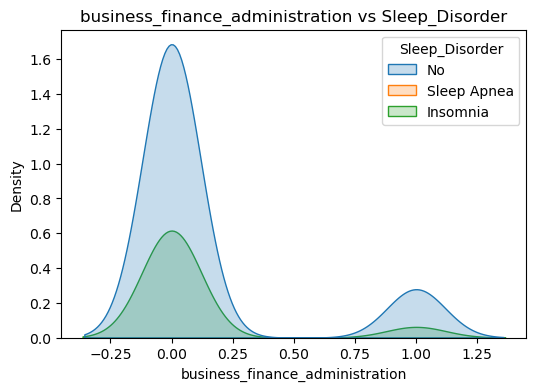

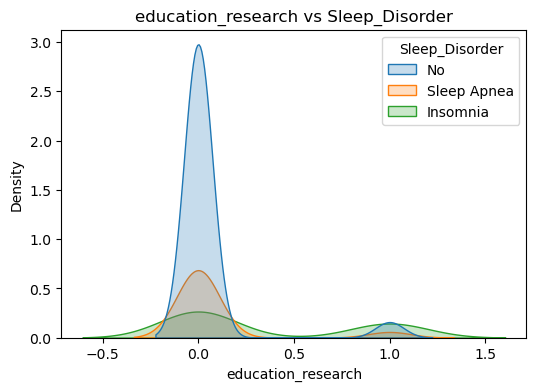

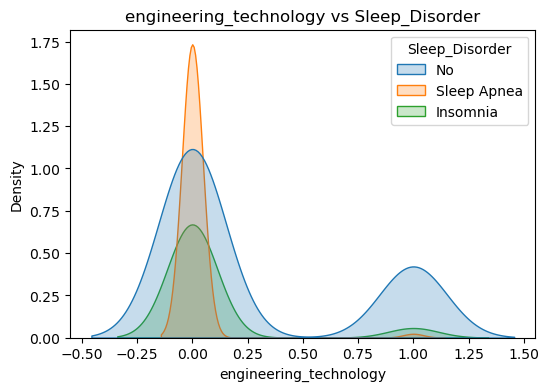

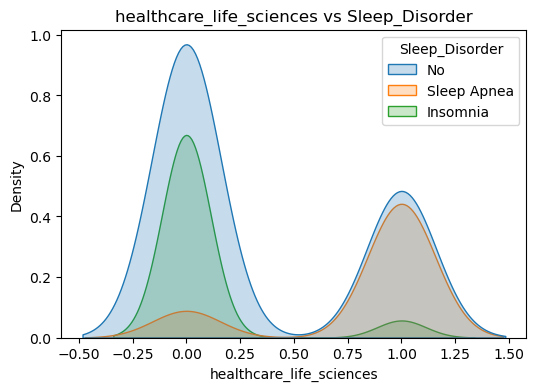

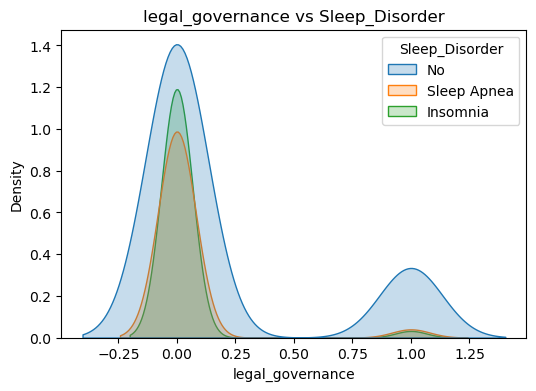

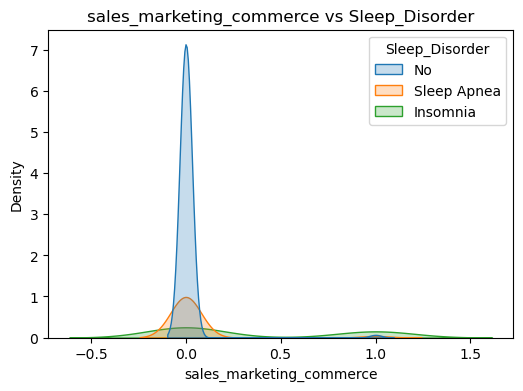

In [37]:
test_before = data[['Occupation', 'Sleep_Disorder']].copy()
test_dumy = pd.get_dummies(test_before['Occupation'],dtype=int)
test_before = pd.concat([test_dumy, test_before.drop(columns='Occupation')],axis=1)
for col in test_before.columns:
    if col == 'Sleep_Disorder':
        continue

    plt.figure(figsize=(6,4))
    sns.kdeplot(
        data=test_before,
        x=col,
        hue='Sleep_Disorder',
        fill=True
    )
    plt.title(f"{col} vs Sleep_Disorder")
    plt.show()


<Axes: xlabel='Occupation', ylabel='count'>

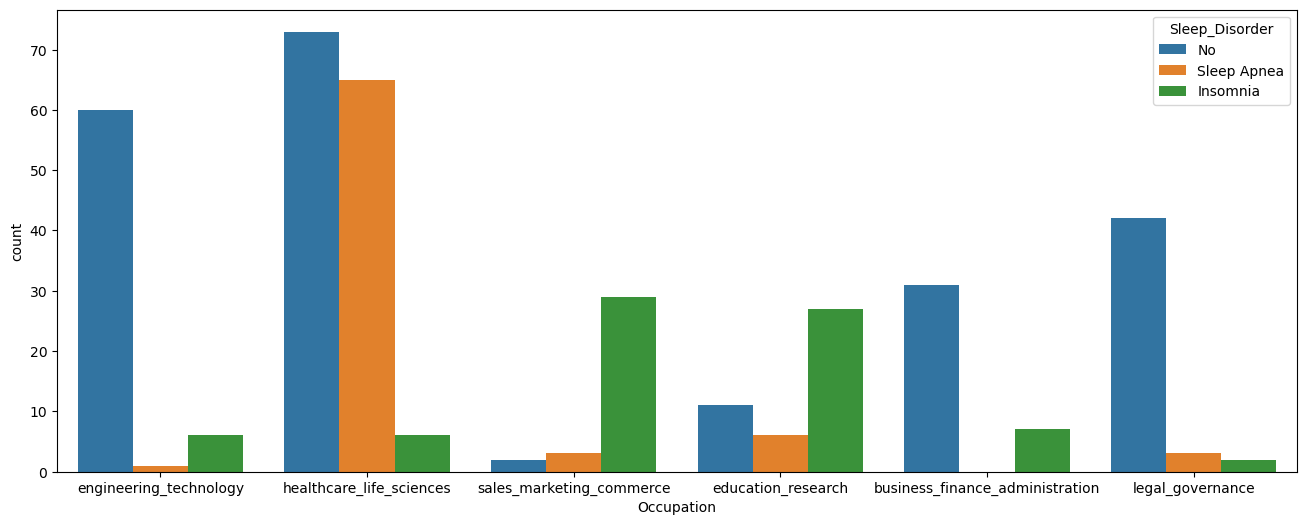

In [38]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Occupation", hue="Sleep_Disorder")

In [39]:
occ_dummies = pd.get_dummies(data['Occupation'], dtype=int, drop_first=True)
data_no_occ = data.drop(columns='Occupation')

sleep_idx = data_no_occ.columns.get_loc('Sleep_Disorder')
data = pd.concat(
    [
        data_no_occ.iloc[:, :sleep_idx],
        occ_dummies,
        data_no_occ.iloc[:, sleep_idx:]
    ],
    axis=1
)


In [40]:
# business_finance_administration is droped

In [41]:
data

Person_ID  Gender  Age  Sleep_Duration  Quality_of_Sleep  \
0            1       1   27             6.1                 6   
1            2       1   28             6.2                 6   
2            3       1   28             6.2                 6   
3            4       1   28             5.9                 4   
4            5       1   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370       0   59             8.1                 9   
370        371       0   59             8.0                 9   
371        372       0   59             8.1                 9   
372        373       0   59             8.1                 9   
373        374       0   59             8.1                 9   

     Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
0                         42             6   Overweight         126/83   
1                         60             8       Normal         125/80   
2                         60             8       Normal         125/80   
3                         30             8        Obese         140/90   
4                         30             8        Obese         140/90   
..                       ...           ...          ...            ...   
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart_Rate  Daily_Steps  education_research  engineering_technology  \
0            77         4200                   0                       1   
1            75        10000                   0                       0   
2            75        10000                   0                       0   
3            85         3000                   0                       0   
4            85         3000                   0                       0   
..          ...          ...                 ...                     ...   
369          68         7000                   0                       0   
370          68         7000                   0                       0   
371          68         7000                   0                       0   
372          68         7000                   0                       0   
373          68         7000                   0                       0   

     healthcare_life_sciences  legal_governance  sales_marketing_commerce  \
0                           0                 0                         0   
1                           1                 0                         0   
2                           1                 0                         0   
3                           0                 0                         1   
4                           0                 0                         1   
..                        ...               ...                       ...   
369                         1                 0                         0   
370                         1                 0                         0   
371                         1                 0                         0   
372                         1                 0                         0   
373                         1                 0                         0   

    Sleep_Disorder  
0               No  
1               No  
2               No  
3      Sleep Apnea  
4      Sleep Apnea  
..             ...  
369    Sleep Apnea  
370    Sleep Apnea  
371    Sleep Apnea  
372    Sleep Apnea  
373    Sleep Apnea  

[374 rows x 17 columns]

### Sleep_Duration

In [42]:
print("len:", len(data.groupby('Sleep_Duration')['Sleep_Duration'].count()))
data.groupby('Sleep_Duration')['Sleep_Duration'].count()

len: 27


Sleep_Duration
5.8     2
5.9     4
6.0    31
6.1    25
6.2    12
6.3    13
6.4     9
6.5    26
6.6    20
6.7     5
6.8     5
6.9     3
7.1    19
7.2    36
7.3    14
7.4     5
7.5     5
7.6    10
7.7    24
7.8    28
7.9     7
8.0    13
8.1    15
8.2    11
8.3     5
8.4    14
8.5    13
Name: Sleep_Duration, dtype: int64

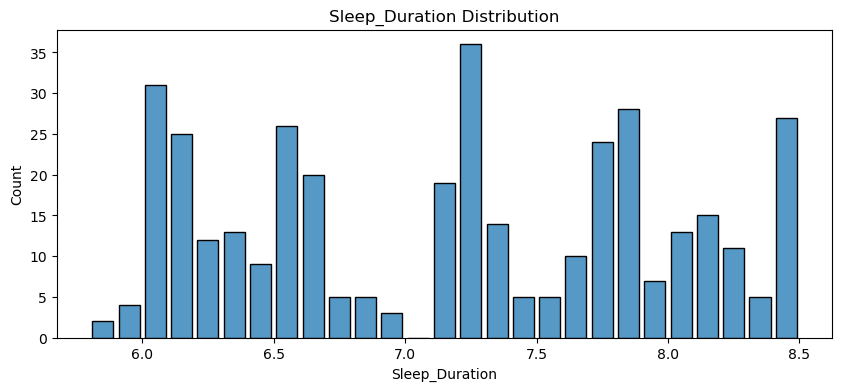

In [43]:
plot_hist(data["Sleep_Duration"],bins=27,shrink=0.8,fig_size=(10,4))

<Axes: xlabel='Sleep_Duration', ylabel='count'>

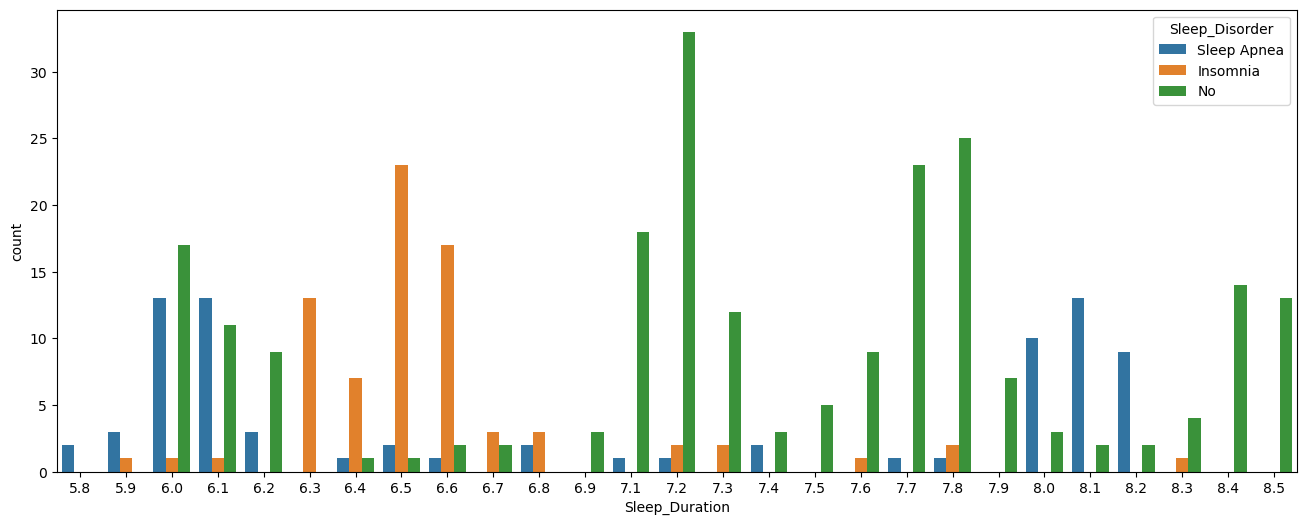

In [44]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Sleep_Duration", hue="Sleep_Disorder")

Text(0.5, 1.0, 'Sleep_Duration vs Sleep_Disorder')

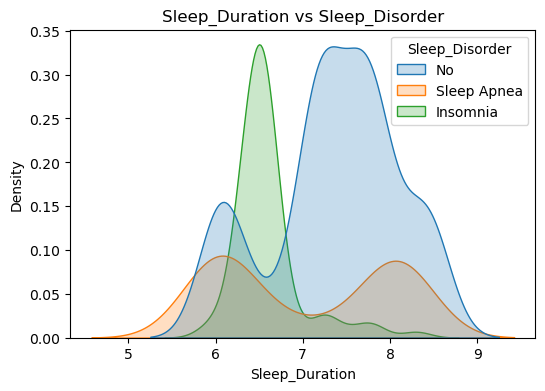

In [45]:
plt.figure(figsize=(6,4))
sns.kdeplot(
        data=data,
        x='Sleep_Duration',
        hue='Sleep_Disorder',
        fill=True
    )
plt.title("Sleep_Duration vs Sleep_Disorder")

### Physical_Activity_Level

In [46]:
print("len:", len(data.groupby('Physical_Activity_Level')['Physical_Activity_Level'].count()))
data.groupby('Physical_Activity_Level')['Physical_Activity_Level'].count()

len: 16


Physical_Activity_Level
30    68
32     2
35     4
40     6
42     2
45    68
47     1
50     4
55     6
60    70
65     2
70     3
75    67
80     2
85     2
90    67
Name: Physical_Activity_Level, dtype: int64

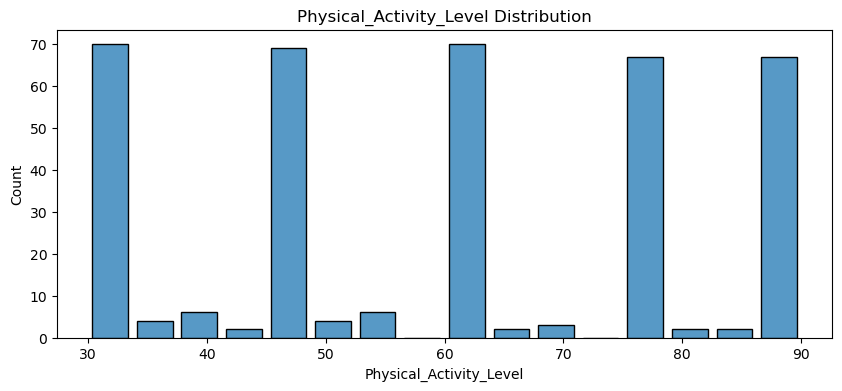

In [47]:
plot_hist(data["Physical_Activity_Level"],bins=16,shrink=0.8,fig_size=(10,4))

<Axes: xlabel='Physical_Activity_Level', ylabel='count'>

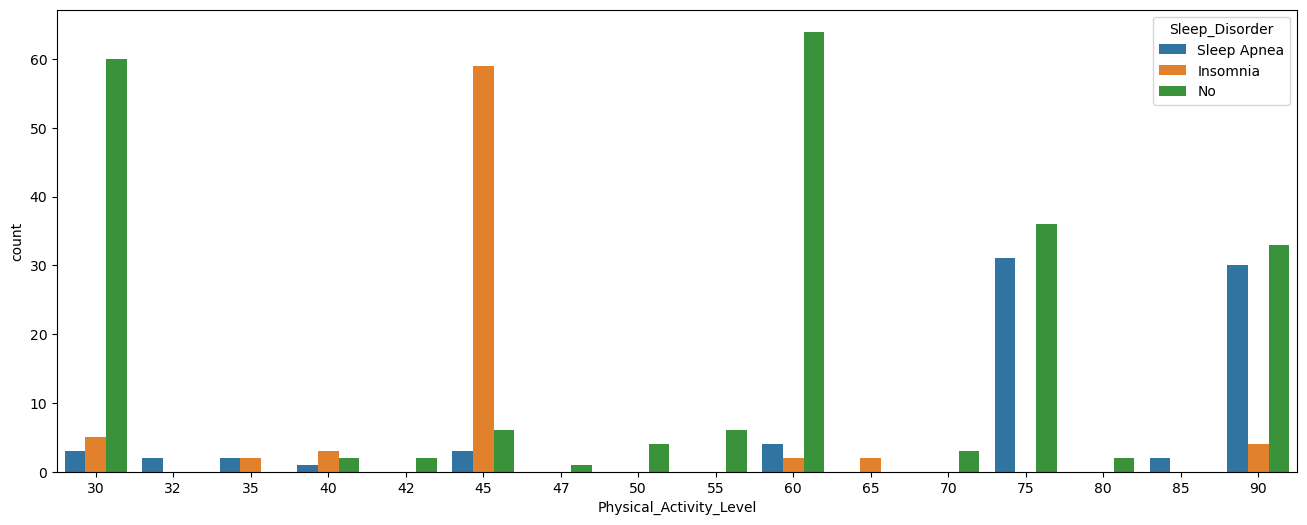

In [48]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Physical_Activity_Level", hue="Sleep_Disorder")

Text(0.5, 1.0, 'Physical_Activity_Level vs Sleep_Disorder')

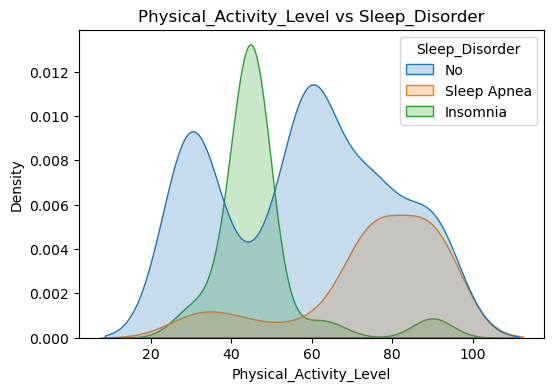

In [49]:
plt.figure(figsize=(6,4))
sns.kdeplot(
        data=data,
        x='Physical_Activity_Level',
        hue='Sleep_Disorder',
        fill=True
    )
plt.title("Physical_Activity_Level vs Sleep_Disorder")

### Stress_Level

In [50]:
print("len:", len(data.groupby('Stress_Level')['Stress_Level'].count()))
data.groupby('Stress_Level')['Stress_Level'].count()

len: 6


Stress_Level
3    71
4    70
5    67
6    46
7    50
8    70
Name: Stress_Level, dtype: int64

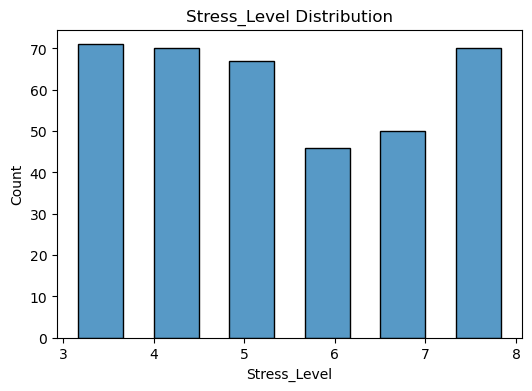

In [51]:
plot_hist(data["Stress_Level"],bins=6,shrink=0.6,fig_size=(6,4))

<Axes: xlabel='Stress_Level', ylabel='count'>

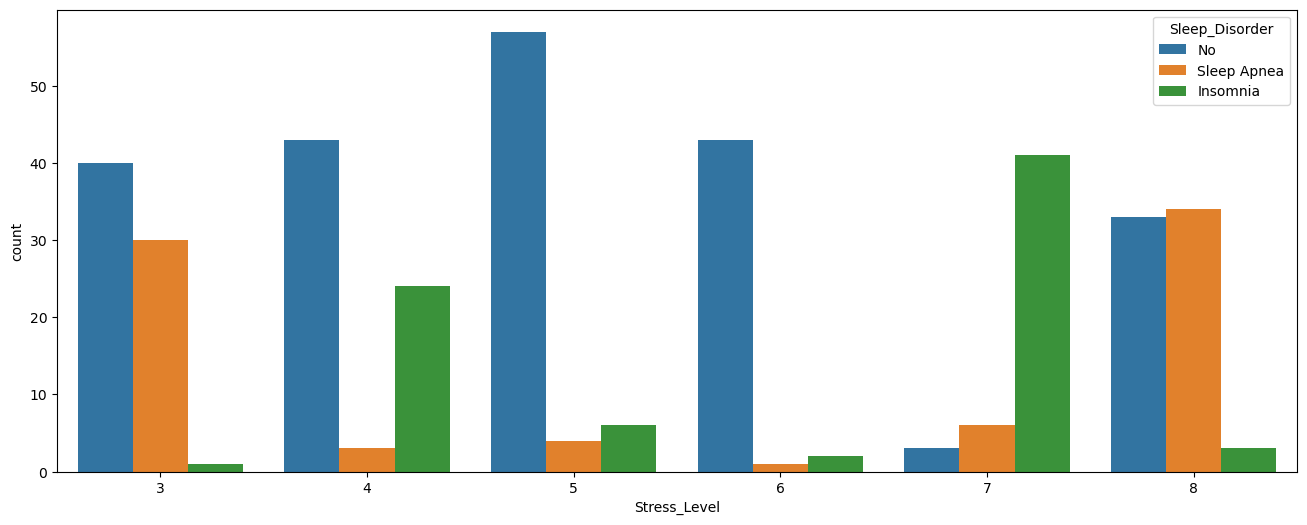

In [52]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Stress_Level", hue="Sleep_Disorder")

Text(0.5, 1.0, 'Stress_Level vs Sleep_Disorder')

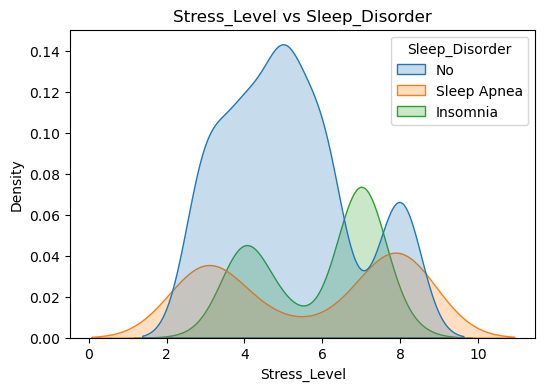

In [53]:
plt.figure(figsize=(6,4))
sns.kdeplot(
        data=data,
        x='Stress_Level',
        hue='Sleep_Disorder',
        fill=True
    )
plt.title("Stress_Level vs Sleep_Disorder")

### BMI_Category

In [54]:
print("len:", len(data.groupby('BMI_Category')['BMI_Category'].count()))
data.groupby('BMI_Category')['BMI_Category'].count()

len: 4


BMI_Category
Normal           195
Normal Weight     21
Obese             10
Overweight       148
Name: BMI_Category, dtype: int64

fix

In [55]:
bmi_class = {
        "underweight": "Normal",
        "normal weight": "Normal Weight",
        "overweight": "Overweight",
        "obesity": "Obese"
    }

In [56]:
bmi_class.items()

dict_items([('underweight', 'Normal'), ('normal weight', 'Normal Weight'), ('overweight', 'Overweight'), ('obesity', 'Obese')])

In [57]:
def bmifix(text,d=bmi_class):
    for k, v in d.items():
        if v == text:
            return k
    return None


In [58]:
data['BMI_Category']=data['BMI_Category'].apply(bmifix)

In [59]:
data

Person_ID  Gender  Age  Sleep_Duration  Quality_of_Sleep  \
0            1       1   27             6.1                 6   
1            2       1   28             6.2                 6   
2            3       1   28             6.2                 6   
3            4       1   28             5.9                 4   
4            5       1   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370       0   59             8.1                 9   
370        371       0   59             8.0                 9   
371        372       0   59             8.1                 9   
372        373       0   59             8.1                 9   
373        374       0   59             8.1                 9   

     Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
0                         42             6   overweight         126/83   
1                         60             8  underweight         125/80   
2                         60             8  underweight         125/80   
3                         30             8      obesity         140/90   
4                         30             8      obesity         140/90   
..                       ...           ...          ...            ...   
369                       75             3   overweight         140/95   
370                       75             3   overweight         140/95   
371                       75             3   overweight         140/95   
372                       75             3   overweight         140/95   
373                       75             3   overweight         140/95   

     Heart_Rate  Daily_Steps  education_research  engineering_technology  \
0            77         4200                   0                       1   
1            75        10000                   0                       0   
2            75        10000                   0                       0   
3            85         3000                   0                       0   
4            85         3000                   0                       0   
..          ...          ...                 ...                     ...   
369          68         7000                   0                       0   
370          68         7000                   0                       0   
371          68         7000                   0                       0   
372          68         7000                   0                       0   
373          68         7000                   0                       0   

     healthcare_life_sciences  legal_governance  sales_marketing_commerce  \
0                           0                 0                         0   
1                           1                 0                         0   
2                           1                 0                         0   
3                           0                 0                         1   
4                           0                 0                         1   
..                        ...               ...                       ...   
369                         1                 0                         0   
370                         1                 0                         0   
371                         1                 0                         0   
372                         1                 0                         0   
373                         1                 0                         0   

    Sleep_Disorder  
0               No  
1               No  
2               No  
3      Sleep Apnea  
4      Sleep Apnea  
..             ...  
369    Sleep Apnea  
370    Sleep Apnea  
371    Sleep Apnea  
372    Sleep Apnea  
373    Sleep Apnea  

[374 rows x 17 columns]

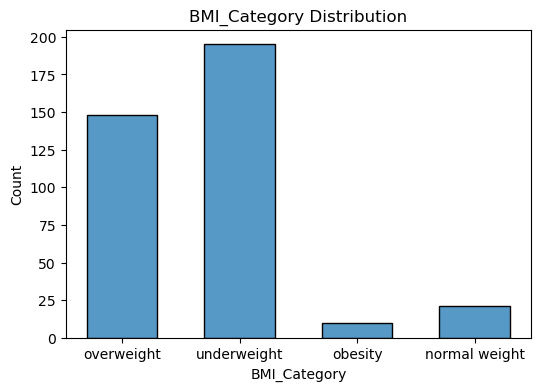

In [60]:
plot_hist(data["BMI_Category"],bins=4,shrink=0.6,fig_size=(6,4))

<Axes: xlabel='BMI_Category', ylabel='count'>

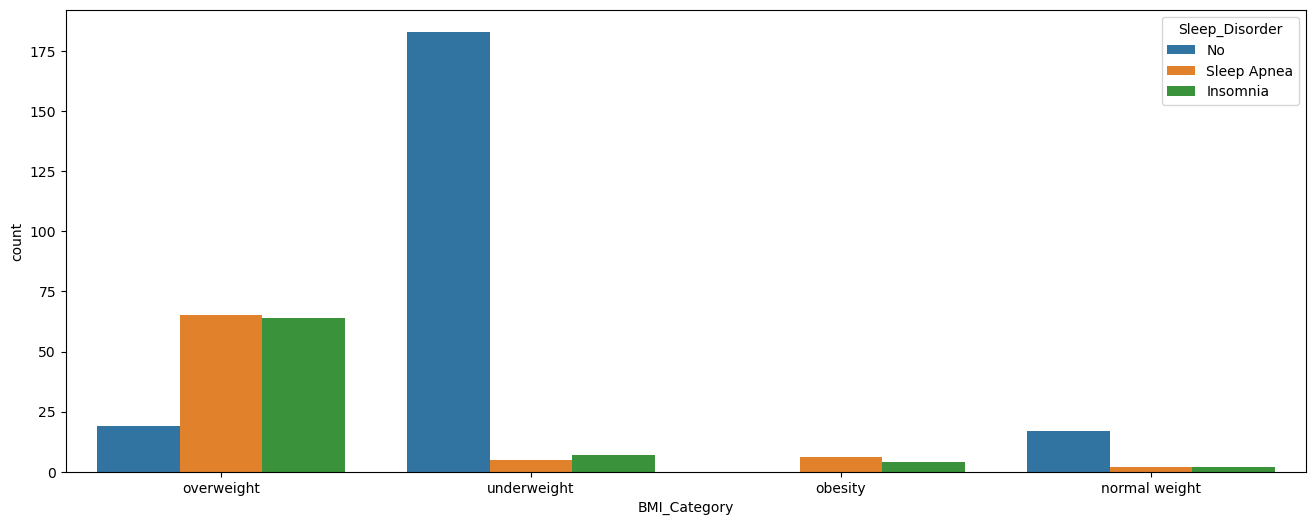

In [61]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="BMI_Category", hue="Sleep_Disorder")

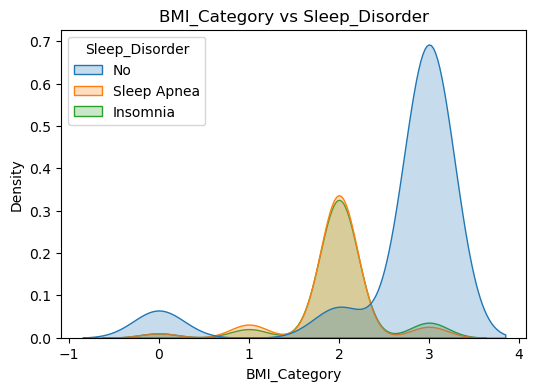

In [62]:
test_before = data[['BMI_Category', 'Sleep_Disorder']].copy()
test_before['BMI_Category'] = lab.fit_transform(test_before['BMI_Category'])

plt.figure(figsize=(6,4))
sns.kdeplot(
    data=test_before,
    x='BMI_Category',
    hue='Sleep_Disorder',
    fill=True
)
plt.title("BMI_Category vs Sleep_Disorder")
plt.show()

In [63]:
test_before = data[['BMI_Category', 'Sleep_Disorder']].copy()
test_dumy = pd.get_dummies(test_before['BMI_Category'],dtype=int)
test_before = pd.concat([test_dumy, test_before.drop(columns='BMI_Category')],axis=1)

In [64]:
test_before

normal weight  obesity  overweight  underweight Sleep_Disorder
0                0        0           1            0             No
1                0        0           0            1             No
2                0        0           0            1             No
3                0        1           0            0    Sleep Apnea
4                0        1           0            0    Sleep Apnea
..             ...      ...         ...          ...            ...
369              0        0           1            0    Sleep Apnea
370              0        0           1            0    Sleep Apnea
371              0        0           1            0    Sleep Apnea
372              0        0           1            0    Sleep Apnea
373              0        0           1            0    Sleep Apnea

[374 rows x 5 columns]

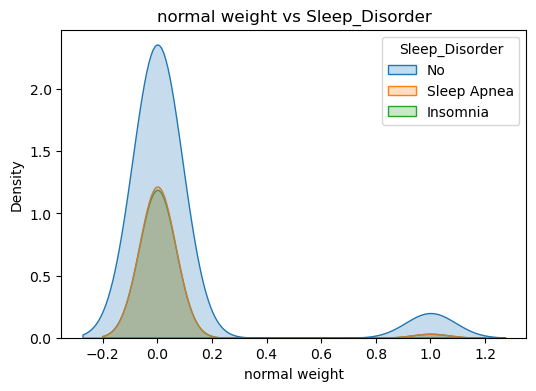

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14848\246303830.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


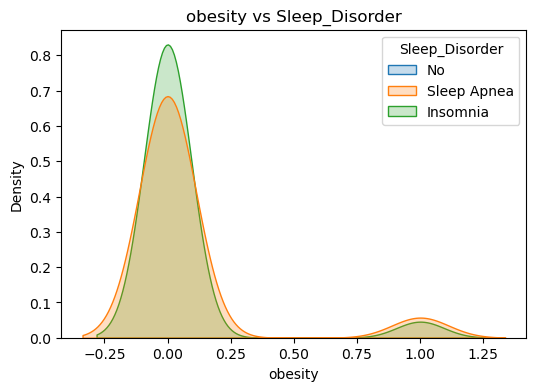

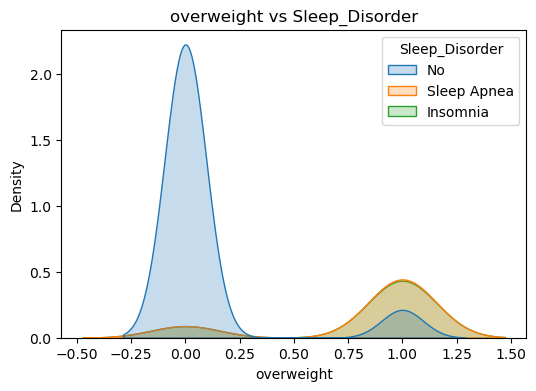

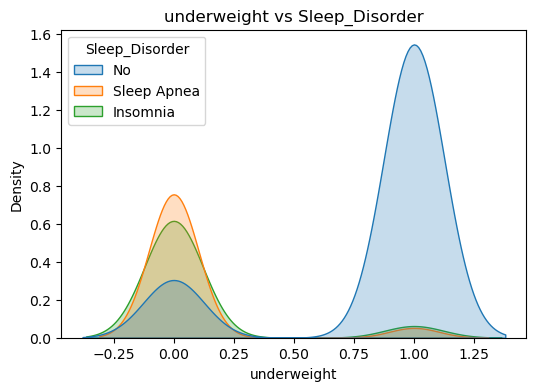

In [65]:
for col in test_before.columns:
    if col == 'Sleep_Disorder':
        continue

    plt.figure(figsize=(6,4))
    sns.kdeplot(
        data=test_before,
        x=col,
        hue='Sleep_Disorder',
        fill=True
    )
    plt.title(f"{col} vs Sleep_Disorder")
    plt.show()

In [66]:
occ_dummies = pd.get_dummies(data['BMI_Category'], dtype=int, drop_first=True)
data_no_occ = data.drop(columns='BMI_Category')

sleep_idx = data_no_occ.columns.get_loc('Sleep_Disorder')
data = pd.concat(
    [
        data_no_occ.iloc[:, :sleep_idx],
        occ_dummies,
        data_no_occ.iloc[:, sleep_idx:]
    ],
    axis=1
)


In [67]:
# normalweight is droped

In [68]:
data

Person_ID  Gender  Age  Sleep_Duration  Quality_of_Sleep  \
0            1       1   27             6.1                 6   
1            2       1   28             6.2                 6   
2            3       1   28             6.2                 6   
3            4       1   28             5.9                 4   
4            5       1   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370       0   59             8.1                 9   
370        371       0   59             8.0                 9   
371        372       0   59             8.1                 9   
372        373       0   59             8.1                 9   
373        374       0   59             8.1                 9   

     Physical_Activity_Level  Stress_Level Blood_Pressure  Heart_Rate  \
0                         42             6         126/83          77   
1                         60             8         125/80          75   
2                         60             8         125/80          75   
3                         30             8         140/90          85   
4                         30             8         140/90          85   
..                       ...           ...            ...         ...   
369                       75             3         140/95          68   
370                       75             3         140/95          68   
371                       75             3         140/95          68   
372                       75             3         140/95          68   
373                       75             3         140/95          68   

     Daily_Steps  education_research  engineering_technology  \
0           4200                   0                       1   
1          10000                   0                       0   
2          10000                   0                       0   
3           3000                   0                       0   
4           3000                   0                       0   
..           ...                 ...                     ...   
369         7000                   0                       0   
370         7000                   0                       0   
371         7000                   0                       0   
372         7000                   0                       0   
373         7000                   0                       0   

     healthcare_life_sciences  legal_governance  sales_marketing_commerce  \
0                           0                 0                         0   
1                           1                 0                         0   
2                           1                 0                         0   
3                           0                 0                         1   
4                           0                 0                         1   
..                        ...               ...                       ...   
369                         1                 0                         0   
370                         1                 0                         0   
371                         1                 0                         0   
372                         1                 0                         0   
373                         1                 0                         0   

     obesity  overweight  underweight Sleep_Disorder  
0          0           1            0             No  
1          0           0            1             No  
2          0           0            1             No  
3          1           0            0    Sleep Apnea  
4          1           0            0    Sleep Apnea  
..       ...         ...          ...            ...  
369        0           1            0    Sleep Apnea  
370        0           1            0    Sleep Apnea  
371        0           1            0    Sleep Apnea  
372        0           1            0    Sleep Apnea  
373        0           1            0    Sleep A

### Blood_Pressure

In [69]:
print("len:", len(data.groupby('Blood_Pressure')['Blood_Pressure'].count()))
data.groupby('Blood_Pressure')['Blood_Pressure'].count()

len: 25


Blood_Pressure
115/75    32
115/78     2
117/76     2
118/75     2
118/76     1
119/77     2
120/80    45
121/79     1
122/80     1
125/80    65
125/82     4
126/83     2
128/84     2
128/85     3
129/84     2
130/85    99
130/86     2
131/86     2
132/87     3
135/88     2
135/90    27
139/91     2
140/90     4
140/95    65
142/92     2
Name: Blood_Pressure, dtype: int64

fix

In [70]:
bp_split = data['Blood_Pressure'].str.split('/', expand=True).astype(float)
bp_split.columns = ['BP_Systolic', 'BP_Diastolic']

data_no_bp = data.drop(columns='Blood_Pressure')

# before education_research
idx = data_no_bp.columns.get_loc('education_research')
data = pd.concat(
    [
        data_no_bp.iloc[:, :idx],
        bp_split,
        data_no_bp.iloc[:, idx:]
    ],
    axis=1
)


In [71]:
data

Person_ID  Gender  Age  Sleep_Duration  Quality_of_Sleep  \
0            1       1   27             6.1                 6   
1            2       1   28             6.2                 6   
2            3       1   28             6.2                 6   
3            4       1   28             5.9                 4   
4            5       1   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370       0   59             8.1                 9   
370        371       0   59             8.0                 9   
371        372       0   59             8.1                 9   
372        373       0   59             8.1                 9   
373        374       0   59             8.1                 9   

     Physical_Activity_Level  Stress_Level  Heart_Rate  Daily_Steps  \
0                         42             6          77         4200   
1                         60             8          75        10000   
2                         60             8          75        10000   
3                         30             8          85         3000   
4                         30             8          85         3000   
..                       ...           ...         ...          ...   
369                       75             3          68         7000   
370                       75             3          68         7000   
371                       75             3          68         7000   
372                       75             3          68         7000   
373                       75             3          68         7000   

     BP_Systolic  BP_Diastolic  education_research  engineering_technology  \
0          126.0          83.0                   0                       1   
1          125.0          80.0                   0                       0   
2          125.0          80.0                   0                       0   
3          140.0          90.0                   0                       0   
4          140.0          90.0                   0                       0   
..           ...           ...                 ...                     ...   
369        140.0          95.0                   0                       0   
370        140.0          95.0                   0                       0   
371        140.0          95.0                   0                       0   
372        140.0          95.0                   0                       0   
373        140.0          95.0                   0                       0   

     healthcare_life_sciences  legal_governance  sales_marketing_commerce  \
0                           0                 0                         0   
1                           1                 0                         0   
2                           1                 0                         0   
3                           0                 0                         1   
4                           0                 0                         1   
..                        ...               ...                       ...   
369                         1                 0                         0   
370                         1                 0                         0   
371                         1                 0                         0   
372                         1                 0                         0   
373                         1                 0                         0   

     obesity  overweight  underweight Sleep_Disorder  
0          0           1            0             No  
1          0           0            1             No  
2          0           0            1             No  
3          1           0            0    Sleep Apnea  
4          1           0            0    Sleep Apnea  
..       ...         ...          ...            ...  
369        0           1            0    Sleep Apnea  
370        0           1            0    Sleep Apnea  
371        0  

<Axes: xlabel='BP_Systolic', ylabel='count'>

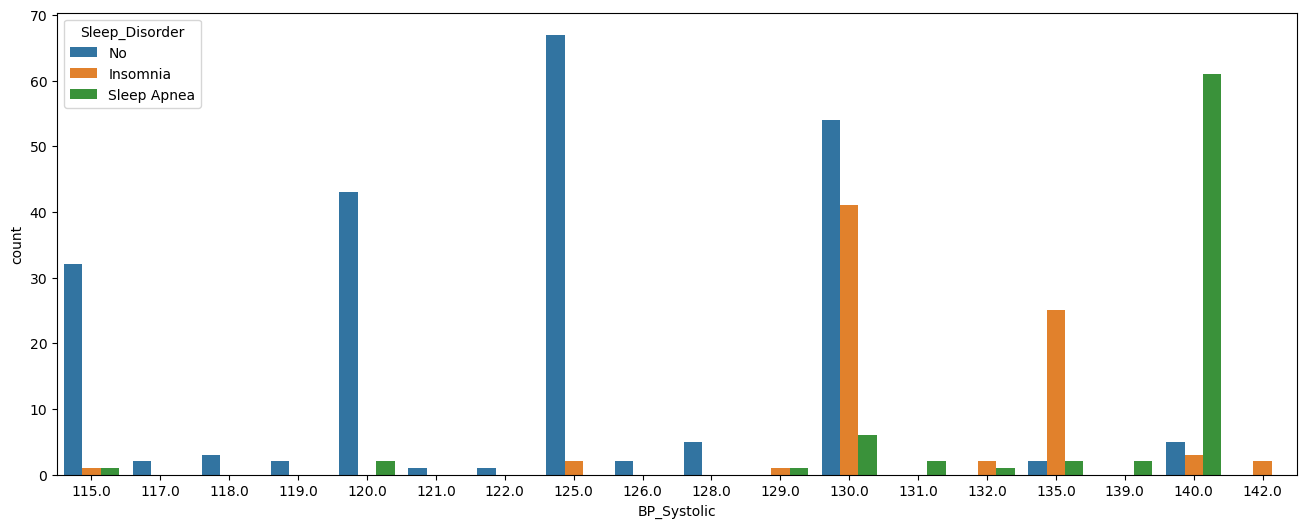

In [72]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="BP_Systolic", hue="Sleep_Disorder")

<Axes: xlabel='BP_Diastolic', ylabel='count'>

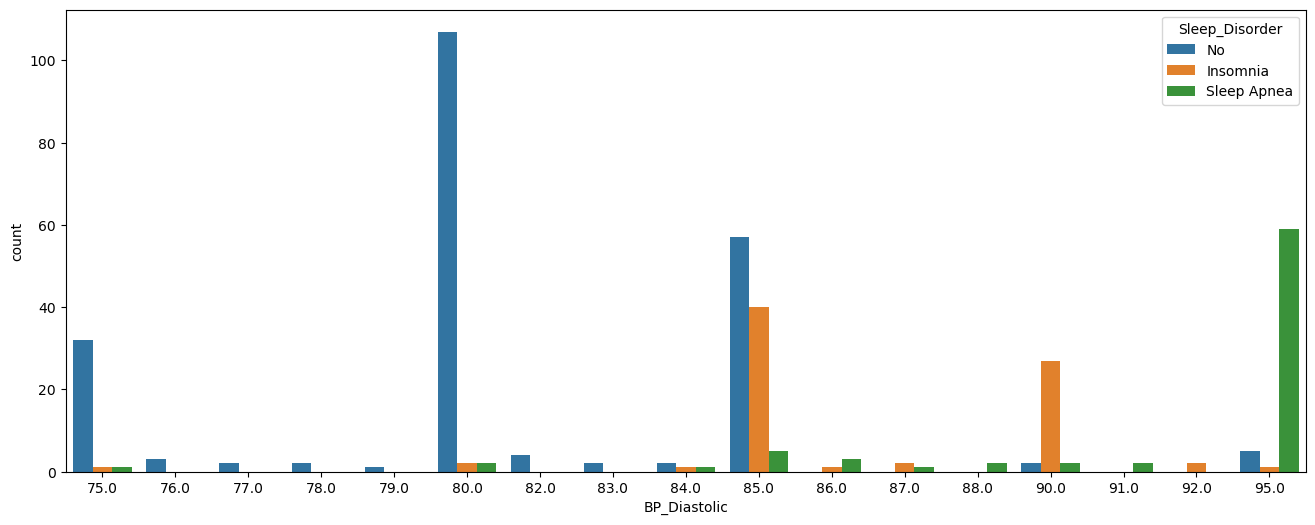

In [73]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="BP_Diastolic", hue="Sleep_Disorder")

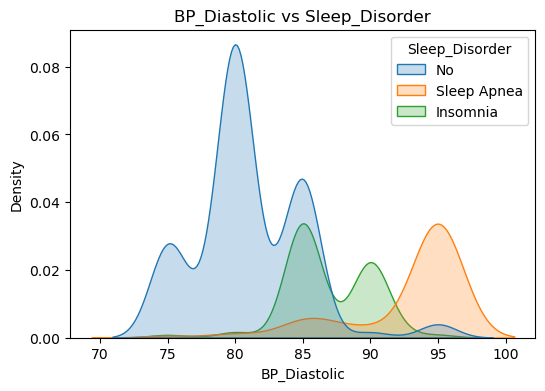

In [74]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    data=data,
    x='BP_Diastolic',
    hue='Sleep_Disorder',
    fill=True
)
plt.title("BP_Diastolic vs Sleep_Disorder")
plt.show()

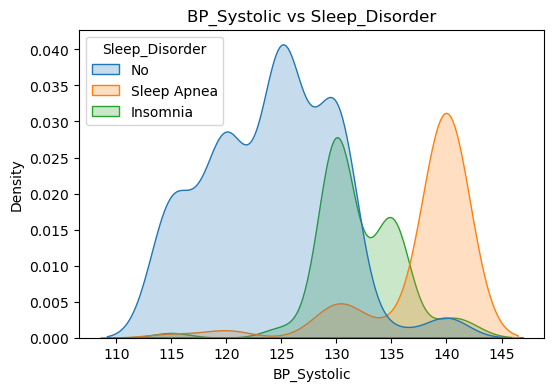

In [75]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    data=data,
    x='BP_Systolic',
    hue='Sleep_Disorder',
    fill=True
)
plt.title("BP_Systolic vs Sleep_Disorder")
plt.show()

### Heart_Rate

In [76]:
print("len:", len(data.groupby('Heart_Rate')['Heart_Rate'].count()))
data.groupby('Heart_Rate')['Heart_Rate'].count()

len: 19


Heart_Rate
65    67
67     2
68    94
69     2
70    76
72    69
73     2
74     2
75    36
76     2
77     2
78     5
80     3
81     2
82     1
83     2
84     2
85     3
86     2
Name: Heart_Rate, dtype: int64

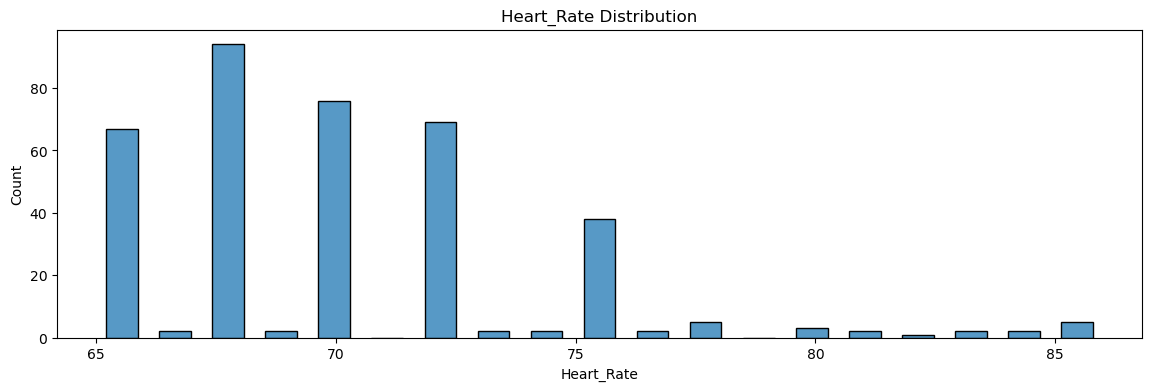

In [77]:
plot_hist(data["Heart_Rate"],bins=19,shrink=0.6,fig_size=(14,4))

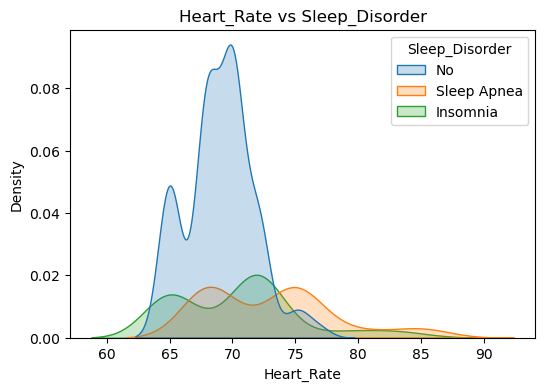

In [78]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    data=data,
    x='Heart_Rate',
    hue='Sleep_Disorder',
    fill=True
)
plt.title("Heart_Rate vs Sleep_Disorder")
plt.show()

### Daily_Steps

In [79]:
print("len:", len(data.groupby('Daily_Steps')['Daily_Steps'].count()))
data.groupby('Daily_Steps')['Daily_Steps'].count()

len: 20


Daily_Steps
3000       3
3300       2
3500       3
3700       2
4000       3
4100       2
4200       2
4800       2
5000      68
5200       2
5500       4
5600       2
6000      68
6200       1
6800       3
7000      66
7300       2
7500       2
8000     101
10000     36
Name: Daily_Steps, dtype: int64

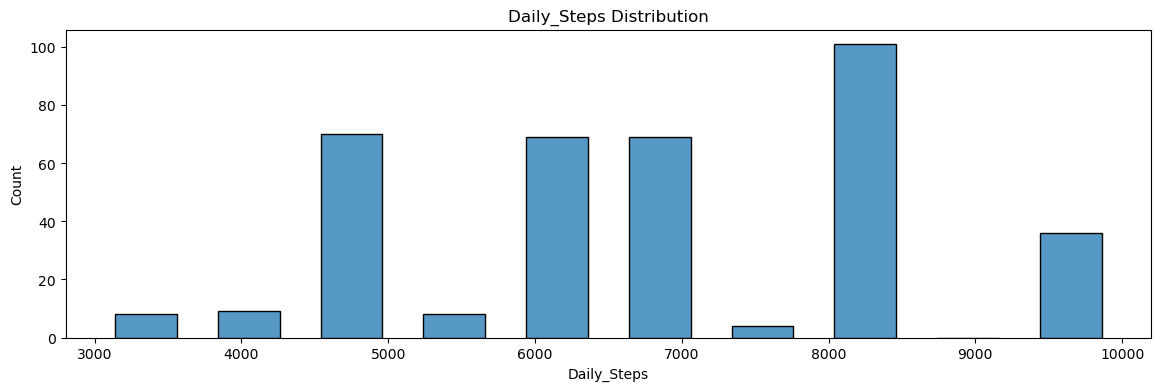

In [80]:
plot_hist(data["Daily_Steps"],bins=10,shrink=0.6,fig_size=(14,4))

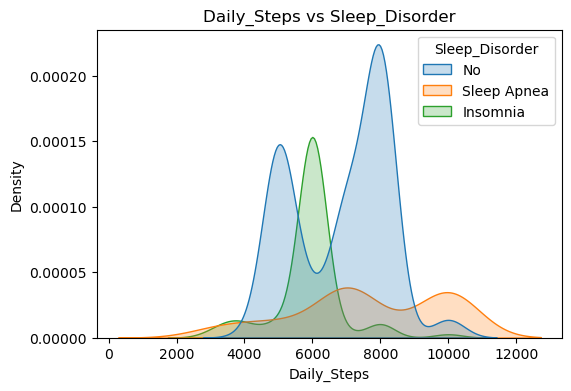

In [81]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    data=data,
    x='Daily_Steps',
    hue='Sleep_Disorder',
    fill=True
)
plt.title("Daily_Steps vs Sleep_Disorder")
plt.show()

### Sleep_Disorder

In [82]:
print("len:", len(data.groupby('Sleep_Disorder')['Sleep_Disorder'].count()))
data.groupby('Sleep_Disorder')['Sleep_Disorder'].count()

len: 3


Sleep_Disorder
Insomnia        77
No             219
Sleep Apnea     78
Name: Sleep_Disorder, dtype: int64

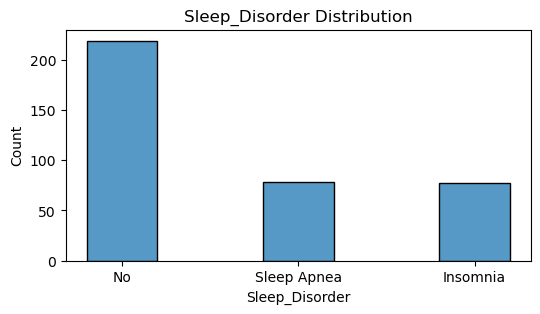

In [83]:
plot_hist(data["Sleep_Disorder"],bins=10,shrink=0.4,fig_size=(6,3))

In [84]:
data['Sleep_Disorder']=lab.fit_transform(data['Sleep_Disorder'])

In [85]:
sldi_dict = dict(zip(lab.classes_, lab.transform(lab.classes_)))
sldi_dict

{'Insomnia': np.int64(0), 'No': np.int64(1), 'Sleep Apnea': np.int64(2)}

In [86]:
data.groupby('Sleep_Disorder')['Sleep_Disorder'].count()

Sleep_Disorder
0     77
1    219
2     78
Name: Sleep_Disorder, dtype: int64

### trainable data

In [87]:
data=data.drop(['Person_ID'],axis=1)

In [88]:
data

Gender  Age  Sleep_Duration  Quality_of_Sleep  Physical_Activity_Level  \
0         1   27             6.1                 6                       42   
1         1   28             6.2                 6                       60   
2         1   28             6.2                 6                       60   
3         1   28             5.9                 4                       30   
4         1   28             5.9                 4                       30   
..      ...  ...             ...               ...                      ...   
369       0   59             8.1                 9                       75   
370       0   59             8.0                 9                       75   
371       0   59             8.1                 9                       75   
372       0   59             8.1                 9                       75   
373       0   59             8.1                 9                       75   

     Stress_Level  Heart_Rate  Daily_Steps  BP_Systolic  BP_Diastolic  \
0               6          77         4200        126.0          83.0   
1               8          75        10000        125.0          80.0   
2               8          75        10000        125.0          80.0   
3               8          85         3000        140.0          90.0   
4               8          85         3000        140.0          90.0   
..            ...         ...          ...          ...           ...   
369             3          68         7000        140.0          95.0   
370             3          68         7000        140.0          95.0   
371             3          68         7000        140.0          95.0   
372             3          68         7000        140.0          95.0   
373             3          68         7000        140.0          95.0   

     education_research  engineering_technology  healthcare_life_sciences  \
0                     0                       1                         0   
1                     0                       0                         1   
2                     0                       0                         1   
3                     0                       0                         0   
4                     0                       0                         0   
..                  ...                     ...                       ...   
369                   0                       0                         1   
370                   0                       0                         1   
371                   0                       0                         1   
372                   0                       0                         1   
373                   0                       0                         1   

     legal_governance  sales_marketing_commerce  obesity  overweight  \
0                   0                         0        0           1   
1                   0                         0        0           0   
2                   0                         0        0           0   
3                   0                         1        1           0   
4                   0                         1        1           0   
..                ...                       ...      ...         ...   
369                 0                         0        0           1   
370                 0                         0        0           1   
371                 0                         0        0           1   
372                 0                         0        0           1   
373                 0                         0        0           1   

     underweight  Sleep_Disorder  
0              0               1  
1              1               1  
2              1               1  
3              0               2  
4              0               2  
..           ...             ...  
369            0               2  
370            0               2  
371            0               2  
372            0               2  
373 

In [89]:
data.isnull().sum()

Gender                      0
Age                         0
Sleep_Duration              0
Quality_of_Sleep            0
Physical_Activity_Level     0
Stress_Level                0
Heart_Rate                  0
Daily_Steps                 0
BP_Systolic                 0
BP_Diastolic                0
education_research          0
engineering_technology      0
healthcare_life_sciences    0
legal_governance            0
sales_marketing_commerce    0
obesity                     0
overweight                  0
underweight                 0
Sleep_Disorder              0
dtype: int64

<Axes: >

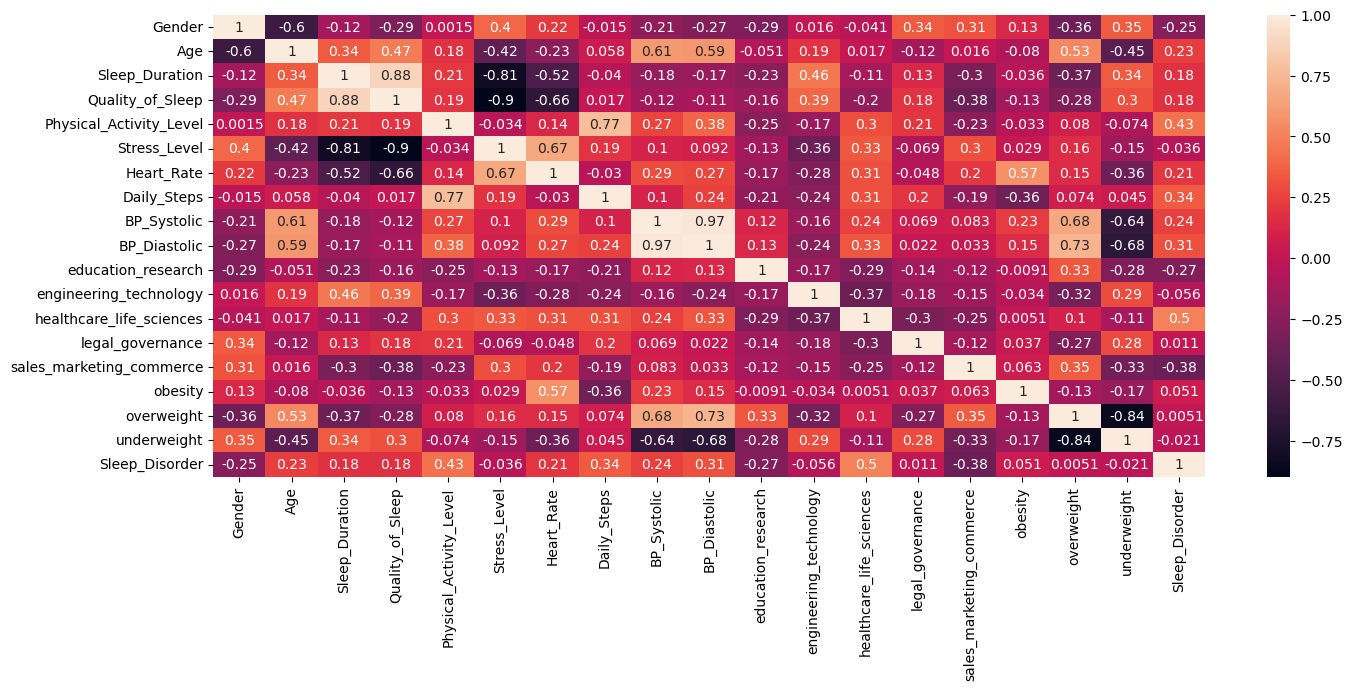

In [90]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)

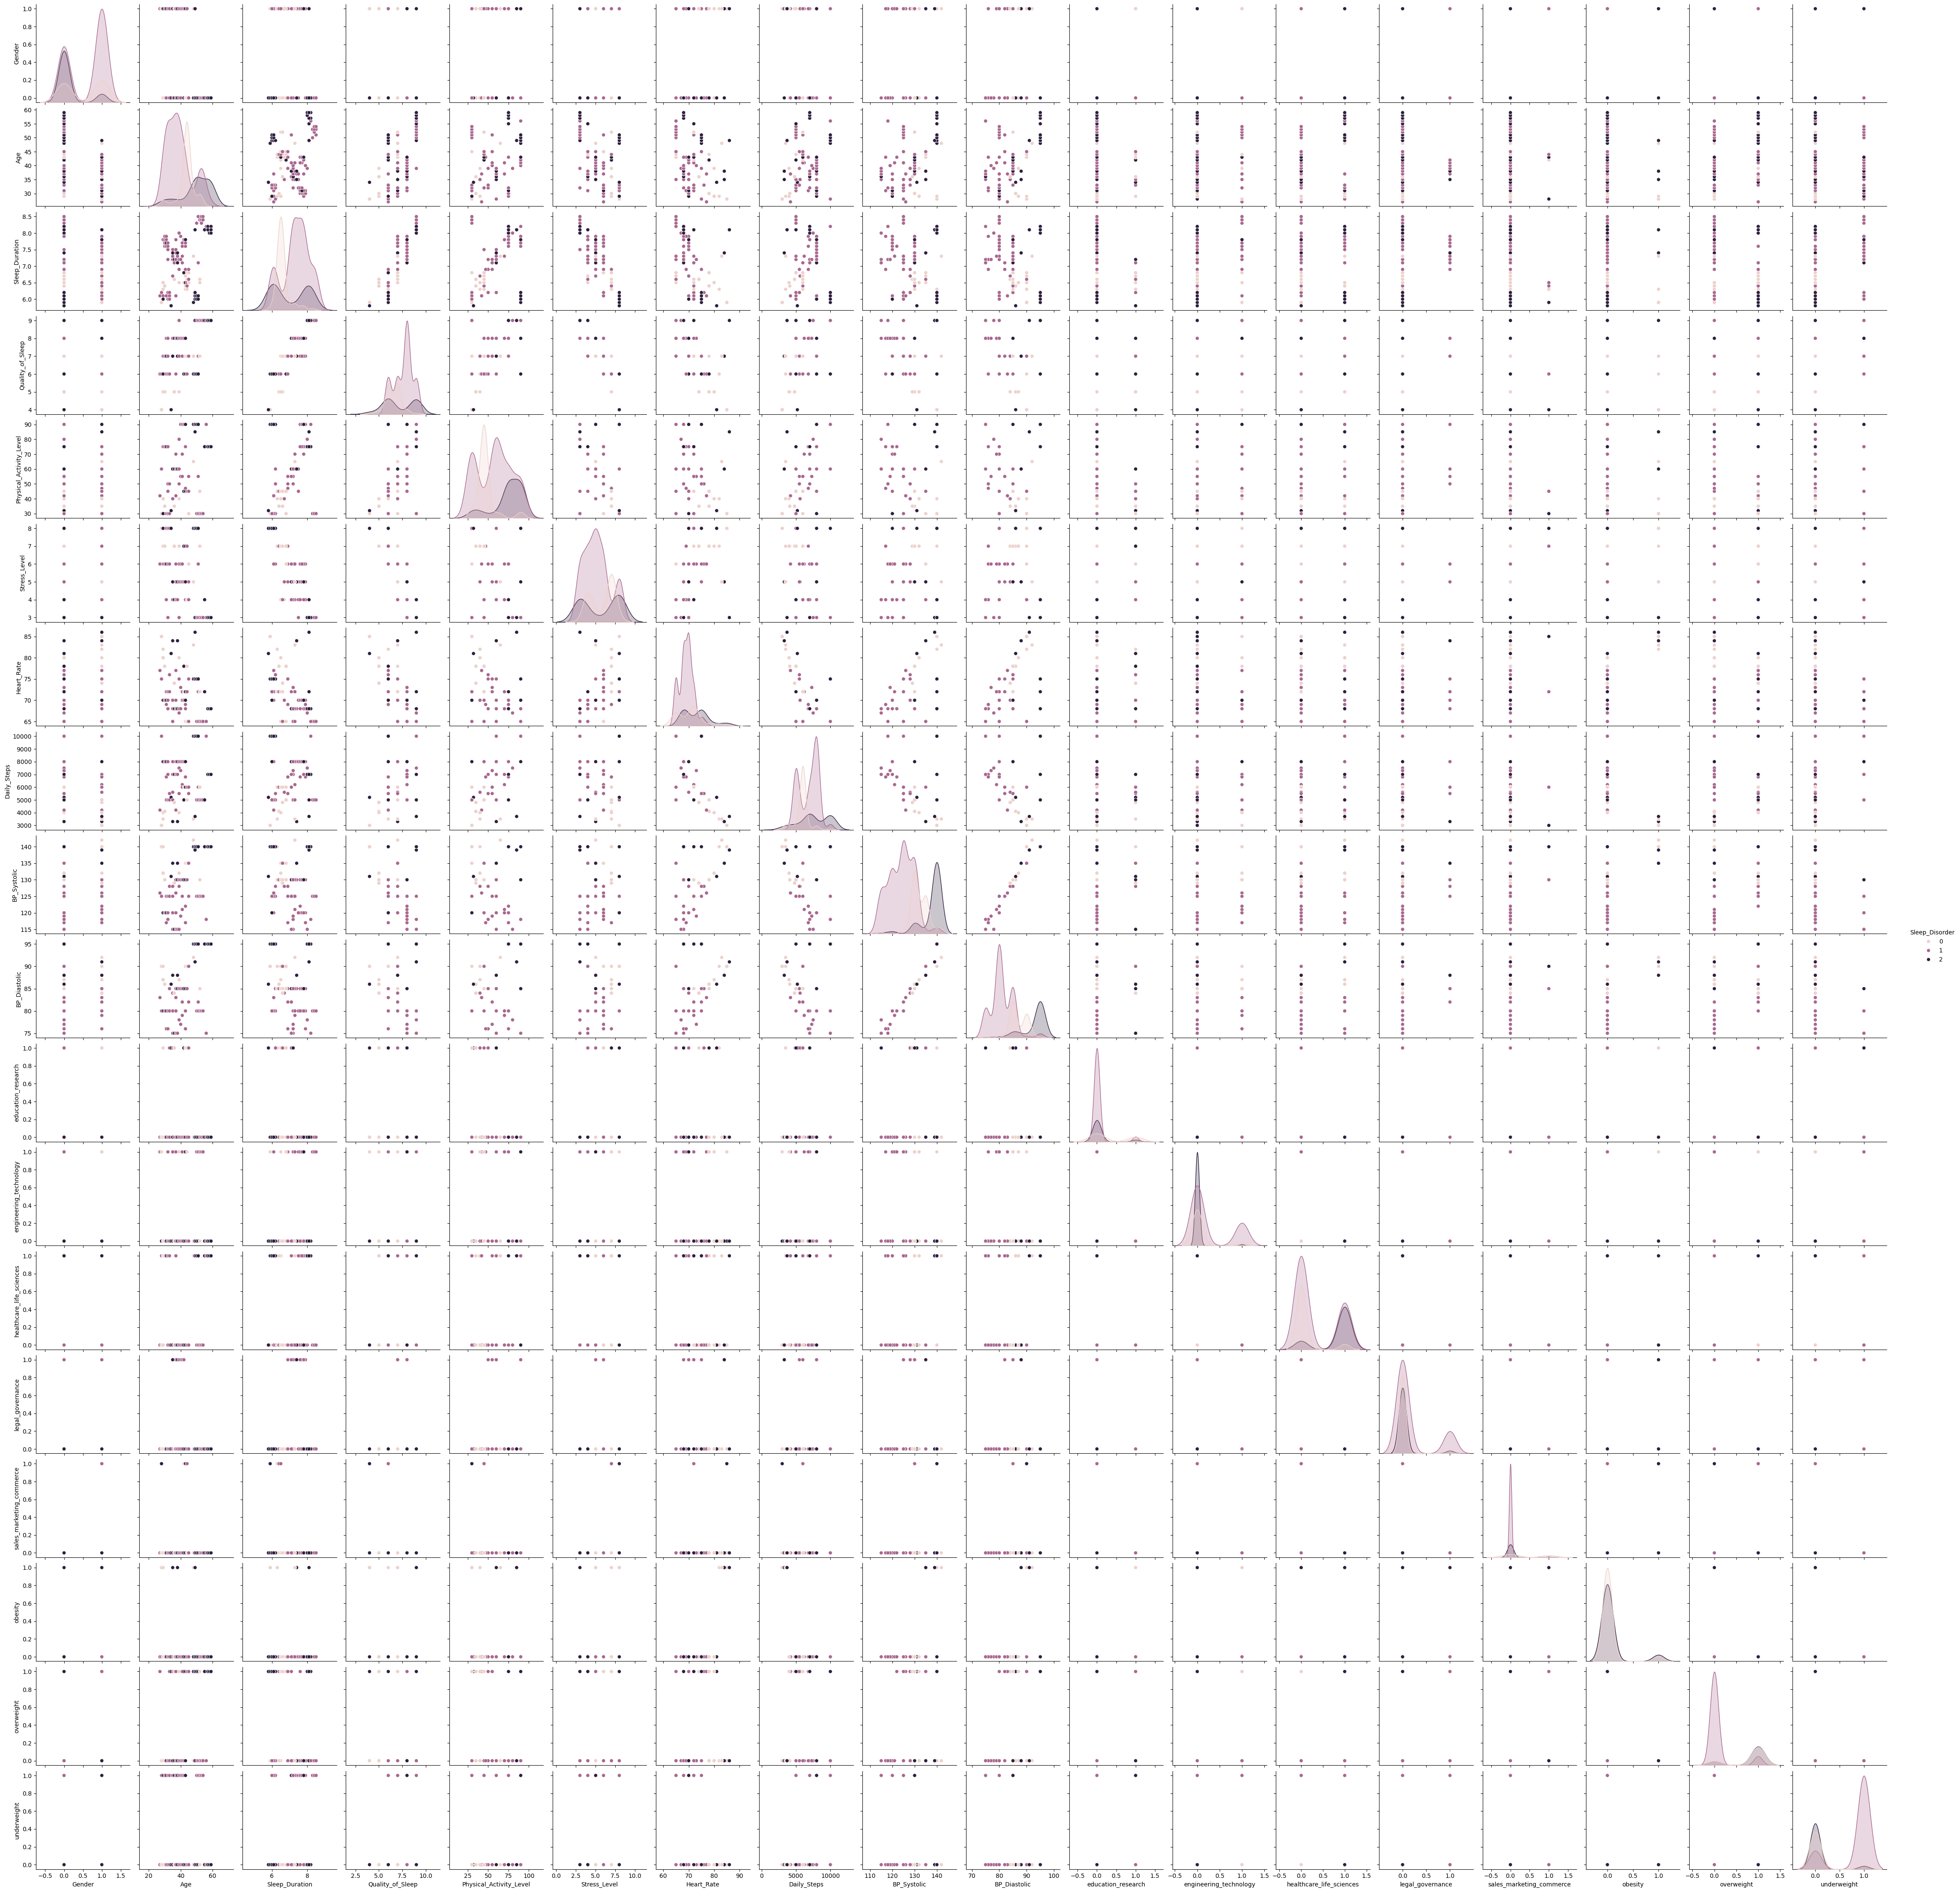

In [91]:
sns.pairplot(data,hue='Sleep_Disorder')

<Figure size 600x400 with 0 Axes>

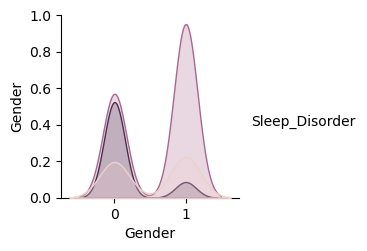

<Figure size 600x400 with 0 Axes>

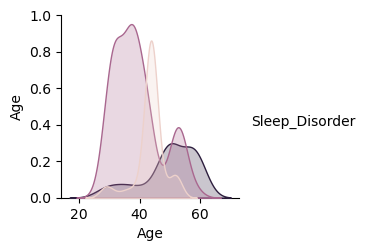

<Figure size 600x400 with 0 Axes>

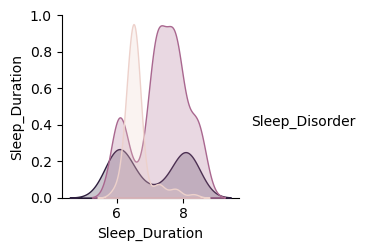

<Figure size 600x400 with 0 Axes>

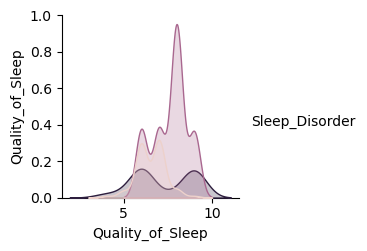

<Figure size 600x400 with 0 Axes>

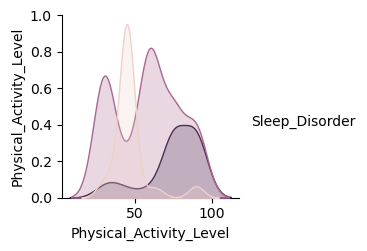

<Figure size 600x400 with 0 Axes>

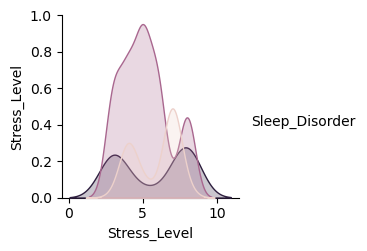

<Figure size 600x400 with 0 Axes>

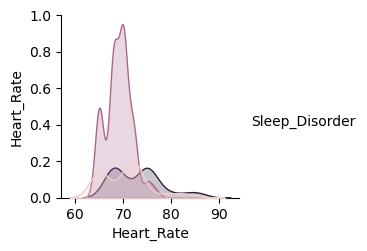

<Figure size 600x400 with 0 Axes>

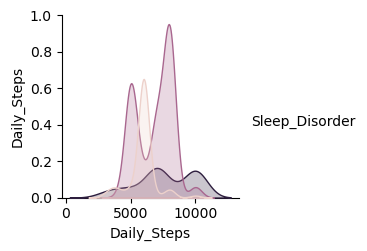

<Figure size 600x400 with 0 Axes>

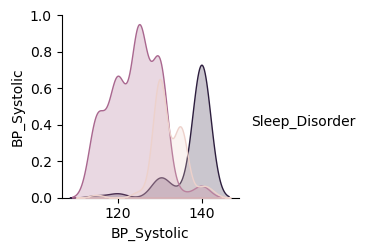

<Figure size 600x400 with 0 Axes>

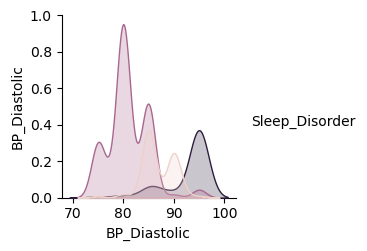

<Figure size 600x400 with 0 Axes>

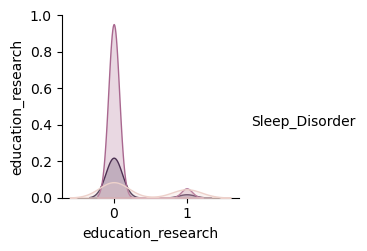

<Figure size 600x400 with 0 Axes>

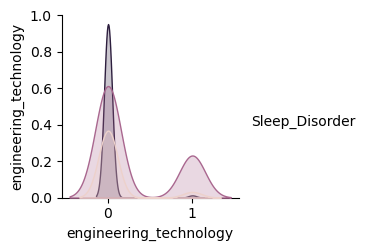

<Figure size 600x400 with 0 Axes>

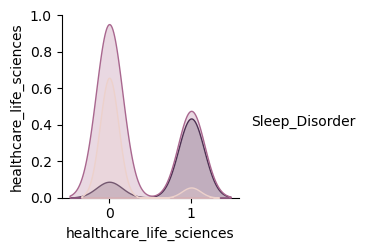

<Figure size 600x400 with 0 Axes>

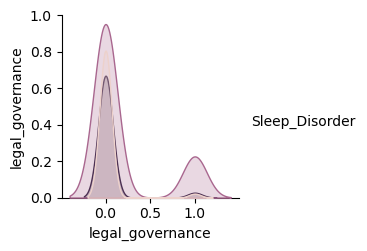

<Figure size 600x400 with 0 Axes>

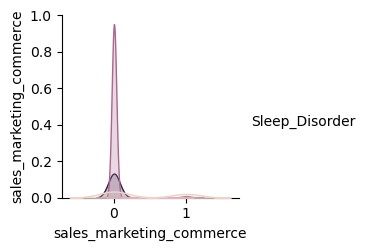

<Figure size 600x400 with 0 Axes>

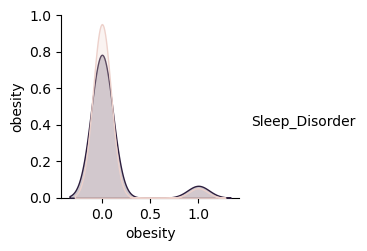

<Figure size 600x400 with 0 Axes>

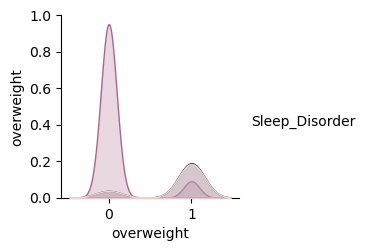

<Figure size 600x400 with 0 Axes>

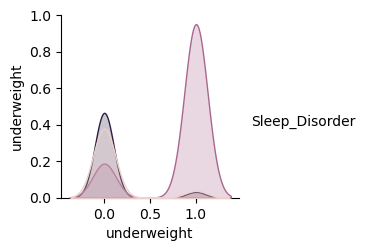

In [92]:
features = data.drop(['Sleep_Disorder'], axis=1).columns

for feature in features:
    plt.figure(figsize=(6,4))
    sns.pairplot(data[['Sleep_Disorder', feature]], hue='Sleep_Disorder')
    plt.show()

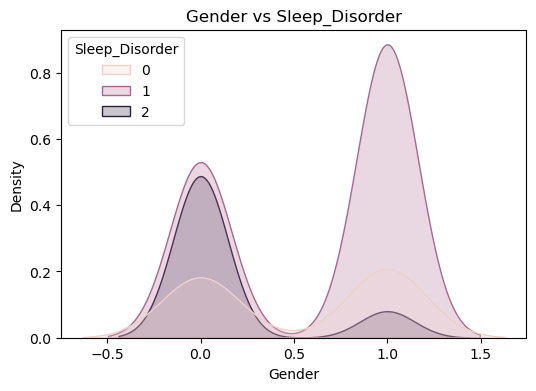

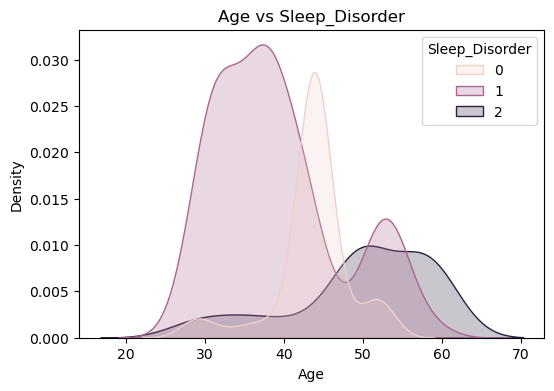

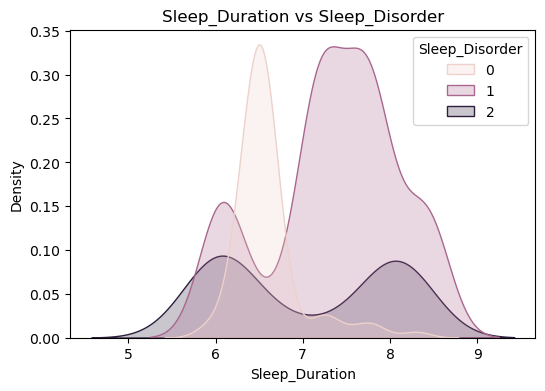

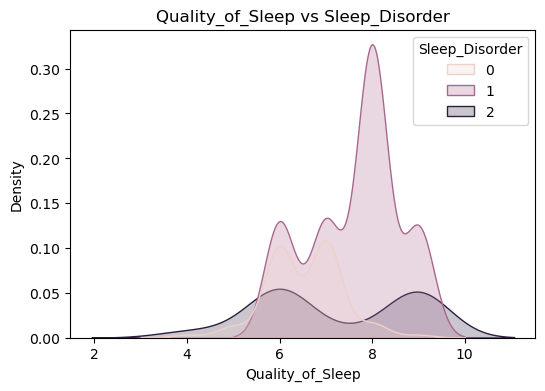

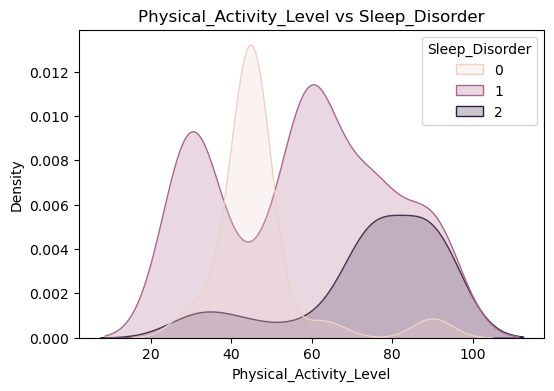

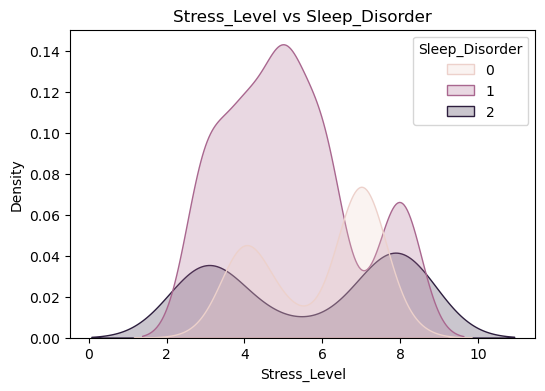

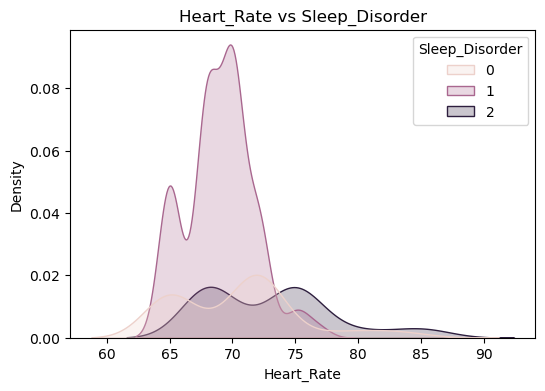

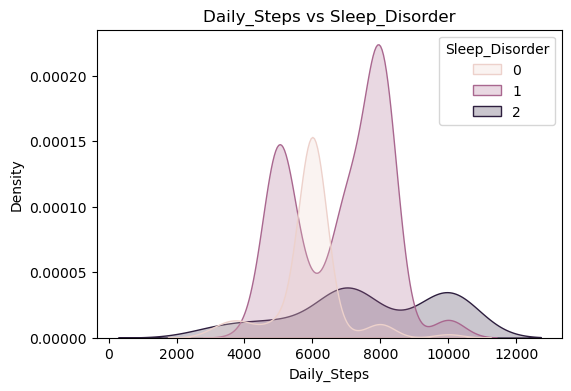

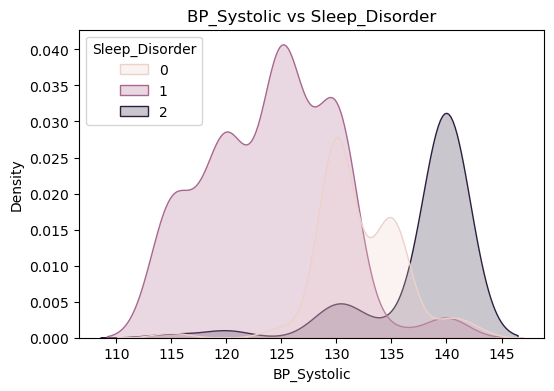

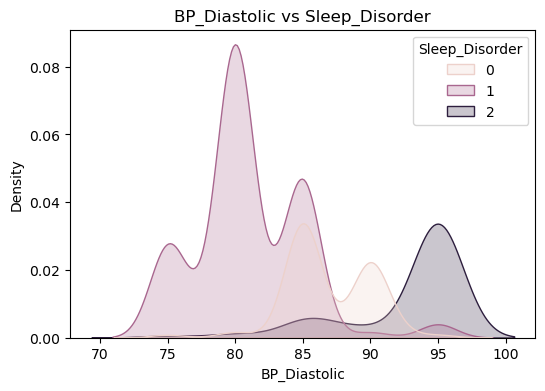

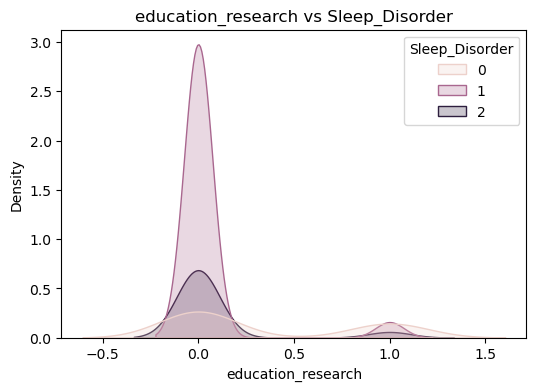

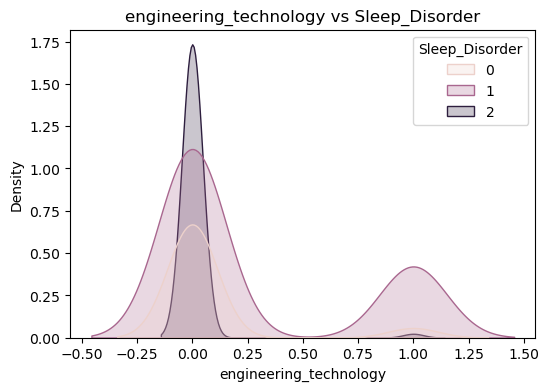

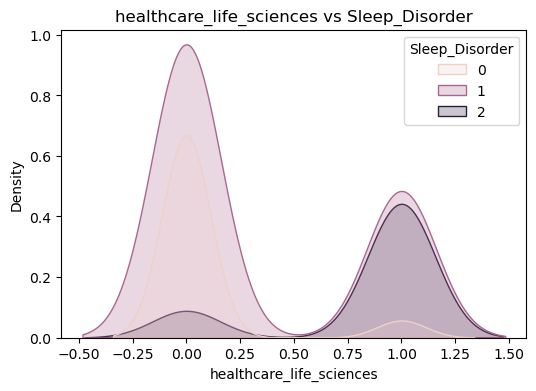

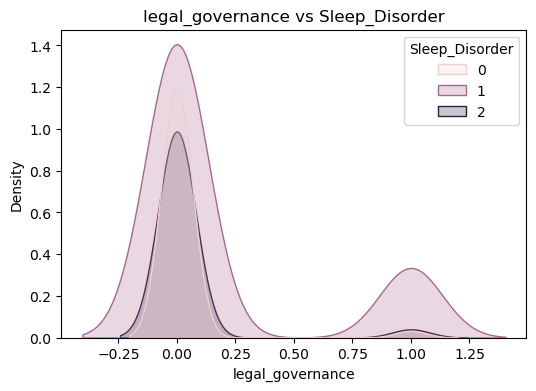

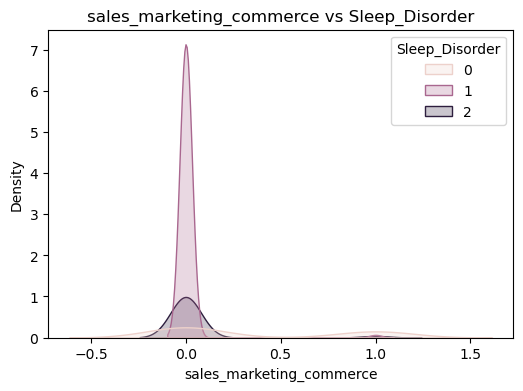

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14848\1362461335.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


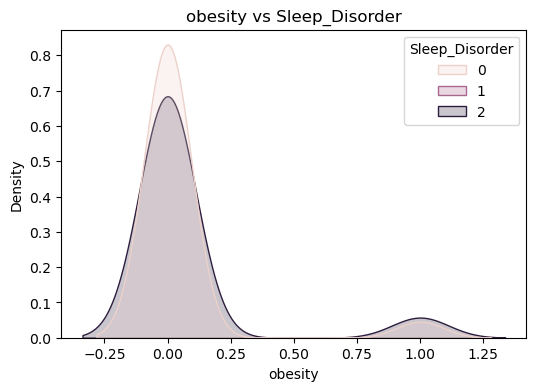

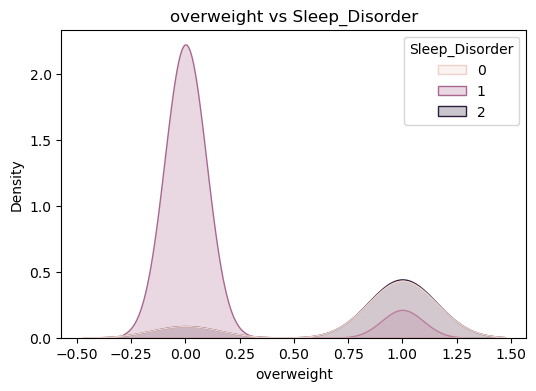

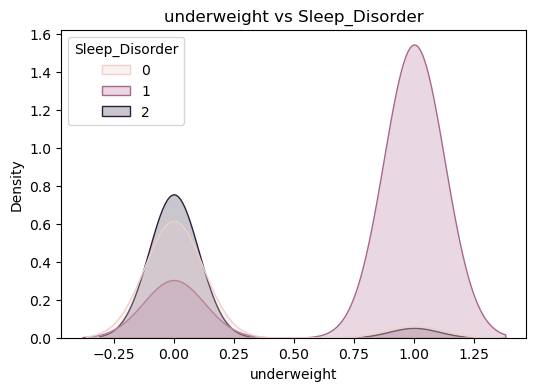

In [93]:
for feature in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(
        data=data,
        x=feature,
        hue='Sleep_Disorder',
        fill=True
    )
    plt.title(f"{feature} vs Sleep_Disorder")
    plt.show()


## bulding tredtional model

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [95]:
data

Gender  Age  Sleep_Duration  Quality_of_Sleep  Physical_Activity_Level  \
0         1   27             6.1                 6                       42   
1         1   28             6.2                 6                       60   
2         1   28             6.2                 6                       60   
3         1   28             5.9                 4                       30   
4         1   28             5.9                 4                       30   
..      ...  ...             ...               ...                      ...   
369       0   59             8.1                 9                       75   
370       0   59             8.0                 9                       75   
371       0   59             8.1                 9                       75   
372       0   59             8.1                 9                       75   
373       0   59             8.1                 9                       75   

     Stress_Level  Heart_Rate  Daily_Steps  BP_Systolic  BP_Diastolic  \
0               6          77         4200        126.0          83.0   
1               8          75        10000        125.0          80.0   
2               8          75        10000        125.0          80.0   
3               8          85         3000        140.0          90.0   
4               8          85         3000        140.0          90.0   
..            ...         ...          ...          ...           ...   
369             3          68         7000        140.0          95.0   
370             3          68         7000        140.0          95.0   
371             3          68         7000        140.0          95.0   
372             3          68         7000        140.0          95.0   
373             3          68         7000        140.0          95.0   

     education_research  engineering_technology  healthcare_life_sciences  \
0                     0                       1                         0   
1                     0                       0                         1   
2                     0                       0                         1   
3                     0                       0                         0   
4                     0                       0                         0   
..                  ...                     ...                       ...   
369                   0                       0                         1   
370                   0                       0                         1   
371                   0                       0                         1   
372                   0                       0                         1   
373                   0                       0                         1   

     legal_governance  sales_marketing_commerce  obesity  overweight  \
0                   0                         0        0           1   
1                   0                         0        0           0   
2                   0                         0        0           0   
3                   0                         1        1           0   
4                   0                         1        1           0   
..                ...                       ...      ...         ...   
369                 0                         0        0           1   
370                 0                         0        0           1   
371                 0                         0        0           1   
372                 0                         0        0           1   
373                 0                         0        0           1   

     underweight  Sleep_Disorder  
0              0               1  
1              1               1  
2              1               1  
3              0               2  
4              0               2  
..           ...             ...  
369            0               2  
370            0               2  
371            0               2  
372            0               2  
373 

In [96]:
features=data.drop(['Sleep_Disorder'],axis=1)
features

Gender  Age  Sleep_Duration  Quality_of_Sleep  Physical_Activity_Level  \
0         1   27             6.1                 6                       42   
1         1   28             6.2                 6                       60   
2         1   28             6.2                 6                       60   
3         1   28             5.9                 4                       30   
4         1   28             5.9                 4                       30   
..      ...  ...             ...               ...                      ...   
369       0   59             8.1                 9                       75   
370       0   59             8.0                 9                       75   
371       0   59             8.1                 9                       75   
372       0   59             8.1                 9                       75   
373       0   59             8.1                 9                       75   

     Stress_Level  Heart_Rate  Daily_Steps  BP_Systolic  BP_Diastolic  \
0               6          77         4200        126.0          83.0   
1               8          75        10000        125.0          80.0   
2               8          75        10000        125.0          80.0   
3               8          85         3000        140.0          90.0   
4               8          85         3000        140.0          90.0   
..            ...         ...          ...          ...           ...   
369             3          68         7000        140.0          95.0   
370             3          68         7000        140.0          95.0   
371             3          68         7000        140.0          95.0   
372             3          68         7000        140.0          95.0   
373             3          68         7000        140.0          95.0   

     education_research  engineering_technology  healthcare_life_sciences  \
0                     0                       1                         0   
1                     0                       0                         1   
2                     0                       0                         1   
3                     0                       0                         0   
4                     0                       0                         0   
..                  ...                     ...                       ...   
369                   0                       0                         1   
370                   0                       0                         1   
371                   0                       0                         1   
372                   0                       0                         1   
373                   0                       0                         1   

     legal_governance  sales_marketing_commerce  obesity  overweight  \
0                   0                         0        0           1   
1                   0                         0        0           0   
2                   0                         0        0           0   
3                   0                         1        1           0   
4                   0                         1        1           0   
..                ...                       ...      ...         ...   
369                 0                         0        0           1   
370                 0                         0        0           1   
371                 0                         0        0           1   
372                 0                         0        0           1   
373                 0                         0        0           1   

     underweight  
0              0  
1              1  
2              1  
3              0  
4              0  
..           ...  
369            0  
370            0  
371            0  
372            0  
373            0  

[374 rows x 18 columns]

In [97]:
features.describe()

Gender         Age  Sleep_Duration  Quality_of_Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean     0.505348   42.184492        7.132086          7.312834   
std      0.500641    8.673133        0.795657          1.196956   
min      0.000000   27.000000        5.800000          4.000000   
25%      0.000000   35.250000        6.400000          6.000000   
50%      1.000000   43.000000        7.200000          7.000000   
75%      1.000000   50.000000        7.800000          8.000000   
max      1.000000   59.000000        8.500000          9.000000   

       Physical_Activity_Level  Stress_Level  Heart_Rate   Daily_Steps  \
count               374.000000    374.000000  374.000000    374.000000   
mean                 59.171123      5.385027   70.165775   6816.844920   
std                  20.830804      1.774526    4.135676   1617.915679   
min                  30.000000      3.000000   65.000000   3000.000000   
25%                  45.000000      4.000000   68.000000   5600.000000   
50%                  60.000000      5.000000   70.000000   7000.000000   
75%                  75.000000      7.000000   72.000000   8000.000000   
max                  90.000000      8.000000   86.000000  10000.000000   

       BP_Systolic  BP_Diastolic  education_research  engineering_technology  \
count   374.000000    374.000000          374.000000              374.000000   
mean    128.553476     84.649733            0.117647                0.179144   
std       7.748118      6.161611            0.322621                0.383987   
min     115.000000     75.000000            0.000000                0.000000   
25%     125.000000     80.000000            0.000000                0.000000   
50%     130.000000     85.000000            0.000000                0.000000   
75%     135.000000     90.000000            0.000000                0.000000   
max     142.000000     95.000000            1.000000                1.000000   

       healthcare_life_sciences  legal_governance  sales_marketing_commerce  \
count                374.000000        374.000000                374.000000   
mean                   0.385027          0.125668                  0.090909   
std                    0.487253          0.331919                  0.287865   
min                    0.000000          0.000000                  0.000000   
25%                    0.000000          0.000000                  0.000000   
50%                    0.000000          0.000000                  0.000000   
75%                    1.000000          0.000000                  0.000000   
max                    1.000000          1.000000                  1.000000   

          obesity  overweight  underweight  
count  374.000000  374.000000   374.000000  
mean     0.026738    0.395722     0.521390  
std      0.161533    0.489660     0.500211  
min      0.000000    0.000000     0.000000  
25%      0.000000    0.000000     0.000000  
50%      0.000000    0.000000     1.000000  
75%      0.000000    1.000000     1.000000  
max      1.000000    1.000000     1.000000

In [98]:
target=pd.DataFrame(data.Sleep_Disorder)
target

Sleep_Disorder
0                 1
1                 1
2                 1
3                 2
4                 2
..              ...
369               2
370               2
371               2
372               2
373               2

[374 rows x 1 columns]

In [99]:
target.describe()

Sleep_Disorder
count      374.000000
mean         1.002674
std          0.644626
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000

In [100]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [102]:
import joblib
import warnings

In [134]:
def clasicalmodels(model,xtrain=xtrain,ytrain=ytrain,xtest=xtest,ytest=ytest):
    warnings.filterwarnings('ignore')
    model.fit(xtrain, ytrain)
    warnings.filterwarnings('ignore')
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    print(model,':')
    print("Train Accuracy:", accuracy_score(ytrain, ypred_train))
    print("Test Accuracy :", accuracy_score(ytest, ypred_test))
    print("model score :",model.score(xtest,ytest))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(confusion_matrix(ytrain, ypred_train),annot=True, fmt='d', ax=axes[0], cmap="Blues", cbar=False)
    axes[0].set_title("Train Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    sns.heatmap(confusion_matrix(ytest, ypred_test),annot=True, fmt='d', ax=axes[1], cmap="Blues", cbar=False)
    axes[1].set_title("Test Confusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    plt.show()
        
    from pathlib import Path
    root=Path("models")
    root.mkdir(exist_ok=True)
    path = root / f"{str(model.__class__.__name__)}.pkl"
    joblib.dump(model, path)

    return model
        

In [135]:
#model.__class__.__name__

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.88
model score : 0.88


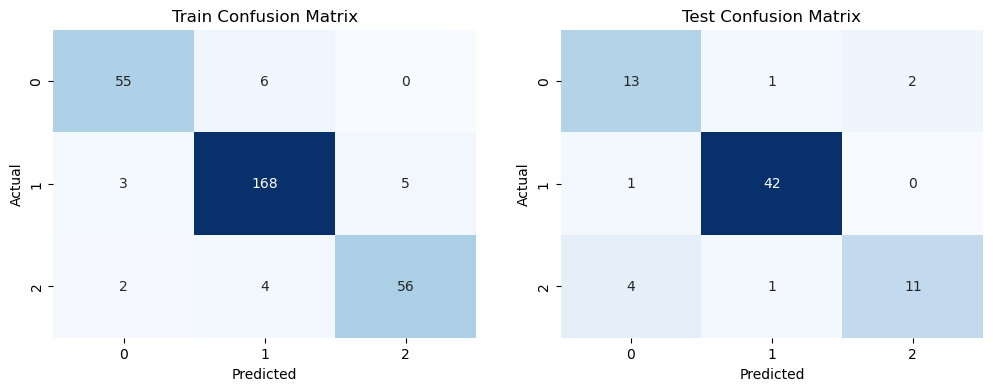

In [136]:
# DecisionTreeClassifier
decitree=clasicalmodels(DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,random_state=42))

RandomForestClassifier(n_estimators=18, random_state=86) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.88
model score : 0.88


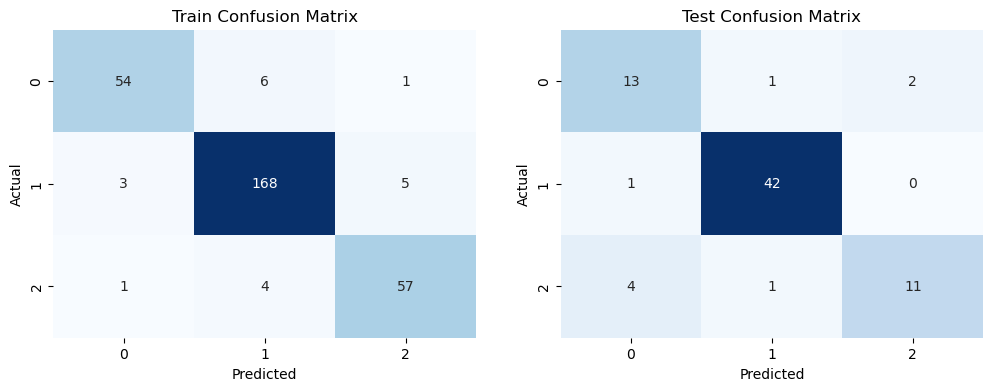

In [137]:
# RandomForestClassifier
warnings.filterwarnings('ignore')
ranfor=clasicalmodels(RandomForestClassifier(n_estimators=18,random_state=86))

LogisticRegression(max_iter=5000, random_state=86) :
Train Accuracy: 0.9130434782608695
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


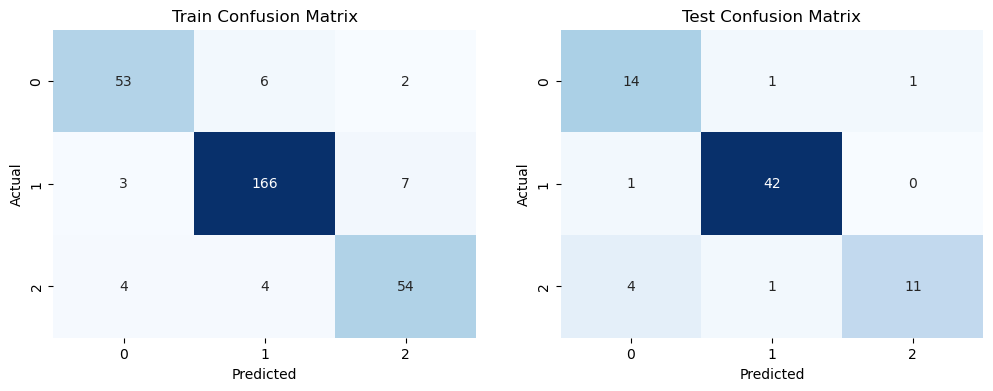

In [138]:
# LogisticRegression
warnings.filterwarnings('ignore')
logcls=clasicalmodels(LogisticRegression(max_iter=5000,random_state=86))

KNeighborsClassifier(n_neighbors=6) :
Train Accuracy: 0.8762541806020067
Test Accuracy : 0.8666666666666667
model score : 0.8666666666666667


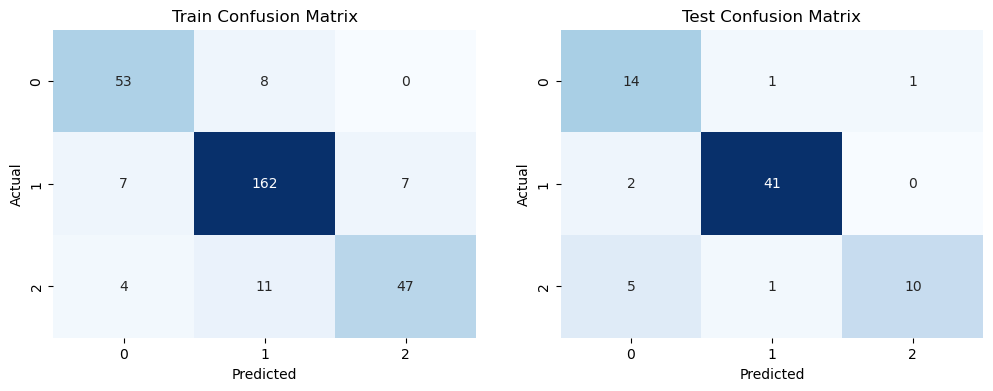

In [139]:
# KNeighborsClassifier
warnings.filterwarnings('ignore')
knc=clasicalmodels(KNeighborsClassifier(n_neighbors=6))
warnings.filterwarnings('ignore')

SVC(C=100, gamma=100, random_state=42) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


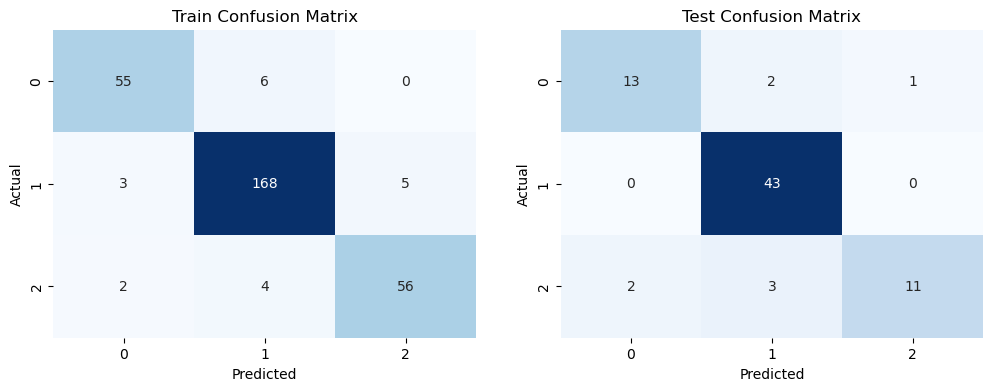

In [140]:
# SVC
warnings.filterwarnings('ignore')
svc=clasicalmodels(SVC(C = 100 ,random_state=42, gamma = 100))

GaussianNB() :
Train Accuracy: 0.8896321070234113
Test Accuracy : 0.8666666666666667
model score : 0.8666666666666667


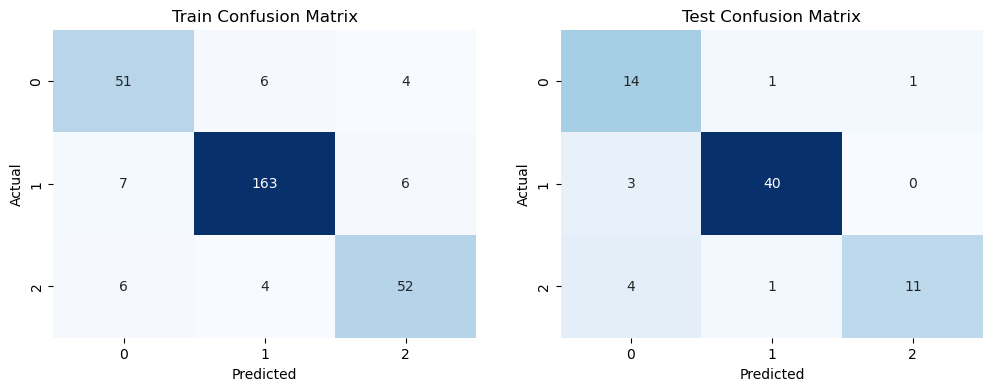

In [110]:
# GaussianNB
warnings.filterwarnings('ignore')
gauss=clasicalmodels(GaussianNB())

In [111]:
# BaggingClassifier

In [112]:
def clasicalmodels(model,pathname,xtrain=xtrain,ytrain=ytrain,xtest=xtest,ytest=ytest):
    model.fit(xtrain, ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    print(model,':')
    print("Train Accuracy:", accuracy_score(ytrain, ypred_train))
    print("Test Accuracy :", accuracy_score(ytest, ypred_test))
    print("model score :",model.score(xtest,ytest))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(confusion_matrix(ytrain, ypred_train),annot=True, fmt='d', ax=axes[0], cmap="Blues", cbar=False)
    axes[0].set_title("Train Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    sns.heatmap(confusion_matrix(ytest, ypred_test),annot=True, fmt='d', ax=axes[1], cmap="Blues", cbar=False)
    axes[1].set_title("Test Confusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    plt.show()
        
    from pathlib import Path
    root=Path("models")
    root.mkdir(exist_ok=True)
    path = root / f"{str(pathname)}.pkl"
    joblib.dump(model, path)

    return model
        

BaggingClassifier(estimator=LogisticRegression(max_iter=5000, random_state=86),
                  n_estimators=15) :
Train Accuracy: 0.9130434782608695
Test Accuracy : 0.9066666666666666
model score : 0.9066666666666666


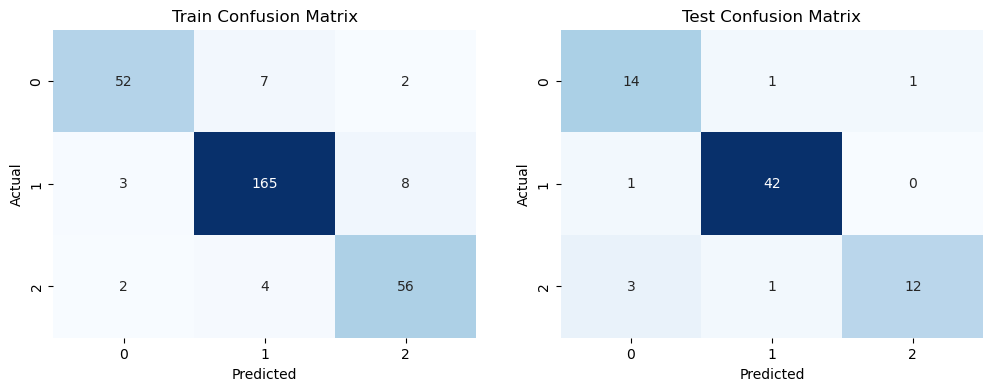

In [113]:
# BaggingClassifier with LogisticRegression
warnings.filterwarnings('ignore')
bag_logr=clasicalmodels(BaggingClassifier(n_estimators=15,estimator=logcls),'BaggingClassifier_LogisticRegression')

BaggingClassifier(estimator=SVC(C=100, gamma=100, random_state=42),
                  n_estimators=15) :
Train Accuracy: 0.9297658862876255
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


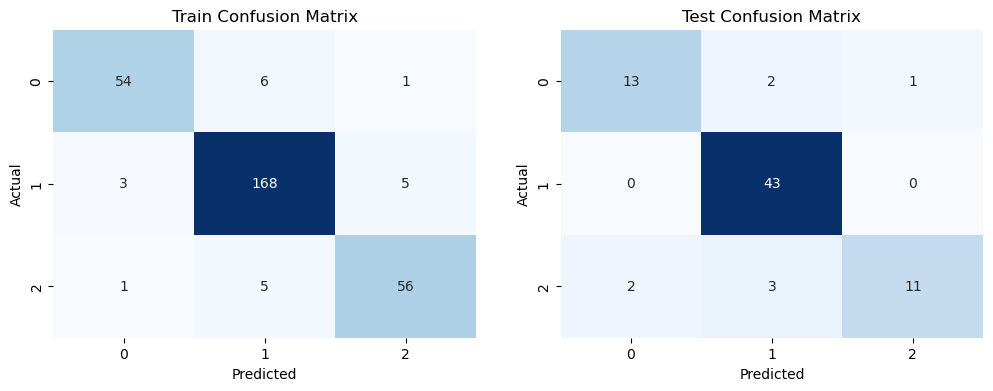

In [114]:
# BaggingClassifier with SVC
warnings.filterwarnings('ignore')
bag_svc=clasicalmodels(BaggingClassifier(n_estimators=15,estimator=svc),'BaggingClassifier_SVC')

BaggingClassifier(estimator=SVC(C=100, gamma=100, random_state=42),
                  n_estimators=15) :
Train Accuracy: 0.9297658862876255
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


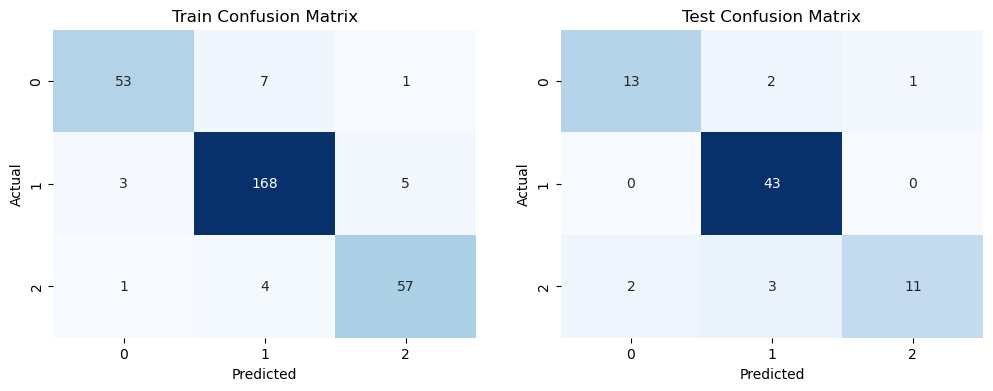

In [115]:
# BaggingClassifier with KNeighborsClassifier
warnings.filterwarnings('ignore')
bag_knn=clasicalmodels(BaggingClassifier(n_estimators=15,estimator=svc),'BaggingClassifier_KNeighborsClassifier')

BaggingClassifier(estimator=SVC(C=100, gamma=100, random_state=42),
                  n_estimators=15) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


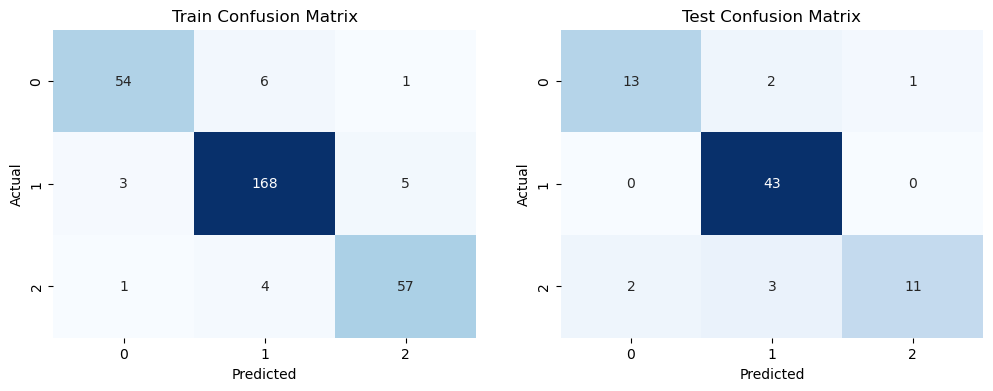

In [116]:
# BaggingClassifier with GaussianNB
warnings.filterwarnings('ignore')
bag_gauss=clasicalmodels(BaggingClassifier(n_estimators=15,estimator=svc),'BaggingClassifier_GaussianNB')

In [117]:
## BaggingClassifier_LogisticRegression with higest score of ~0.9 in clasical machine learning

### simple FFN

In [118]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [119]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [120]:
scale=StandardScaler()

In [121]:
data

Gender  Age  Sleep_Duration  Quality_of_Sleep  Physical_Activity_Level  \
0         1   27             6.1                 6                       42   
1         1   28             6.2                 6                       60   
2         1   28             6.2                 6                       60   
3         1   28             5.9                 4                       30   
4         1   28             5.9                 4                       30   
..      ...  ...             ...               ...                      ...   
369       0   59             8.1                 9                       75   
370       0   59             8.0                 9                       75   
371       0   59             8.1                 9                       75   
372       0   59             8.1                 9                       75   
373       0   59             8.1                 9                       75   

     Stress_Level  Heart_Rate  Daily_Steps  BP_Systolic  BP_Diastolic  \
0               6          77         4200        126.0          83.0   
1               8          75        10000        125.0          80.0   
2               8          75        10000        125.0          80.0   
3               8          85         3000        140.0          90.0   
4               8          85         3000        140.0          90.0   
..            ...         ...          ...          ...           ...   
369             3          68         7000        140.0          95.0   
370             3          68         7000        140.0          95.0   
371             3          68         7000        140.0          95.0   
372             3          68         7000        140.0          95.0   
373             3          68         7000        140.0          95.0   

     education_research  engineering_technology  healthcare_life_sciences  \
0                     0                       1                         0   
1                     0                       0                         1   
2                     0                       0                         1   
3                     0                       0                         0   
4                     0                       0                         0   
..                  ...                     ...                       ...   
369                   0                       0                         1   
370                   0                       0                         1   
371                   0                       0                         1   
372                   0                       0                         1   
373                   0                       0                         1   

     legal_governance  sales_marketing_commerce  obesity  overweight  \
0                   0                         0        0           1   
1                   0                         0        0           0   
2                   0                         0        0           0   
3                   0                         1        1           0   
4                   0                         1        1           0   
..                ...                       ...      ...         ...   
369                 0                         0        0           1   
370                 0                         0        0           1   
371                 0                         0        0           1   
372                 0                         0        0           1   
373                 0                         0        0           1   

     underweight  Sleep_Disorder  
0              0               1  
1              1               1  
2              1               1  
3              0               2  
4              0               2  
..           ...             ...  
369            0               2  
370            0               2  
371            0               2  
372            0               2  
373 

In [122]:
data['Age']=scale.fit_transform(data[['Age']])
data['Sleep_Duration']=scale.fit_transform(data[['Sleep_Duration']])
data['Physical_Activity_Level']=scale.fit_transform(data[['Physical_Activity_Level']])
data['BP_Systolic']=scale.fit_transform(data[['BP_Systolic']])
data['BP_Diastolic']=scale.fit_transform(data[['BP_Diastolic']])
data['Heart_Rate']=scale.fit_transform(data[['Heart_Rate']])
data['Daily_Steps']=scale.fit_transform(data[['Sleep_Duration']])

In [123]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values.squeeze(), dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [124]:
train_dataset = CustomDataset(features,target)

In [125]:
train_dataloader = DataLoader(train_dataset, batch_size=30, shuffle=True)

In [126]:
for i in range(30):
    print(next(iter(train_dataloader)))

[tensor([[1.0000e+00, 2.8000e+01, 6.2000e+00, 6.0000e+00, 6.0000e+01, 8.0000e+00,
         7.5000e+01, 1.0000e+04, 1.2500e+02, 8.0000e+01, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.0000e+00, 2.9000e+01, 7.8000e+00, 7.0000e+00, 7.5000e+01, 6.0000e+00,
         7.0000e+01, 8.0000e+03, 1.2000e+02, 8.0000e+01, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [0.0000e+00, 4.9000e+01, 6.0000e+00, 6.0000e+00, 9.0000e+01, 8.0000e+00,
         7.5000e+01, 1.0000e+04, 1.4000e+02, 9.5000e+01, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.6000e+01, 7.2000e+00, 8.0000e+00, 6.0000e+01, 4.0000e+00,
         6.8000e+01, 7.0000e+03, 1.1500e+02, 7.5000e+01, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
        [0.0000e+00, 5.

In [168]:
class simple_ffn(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(64, output_features)
        )

    def forward(self, x):
        return self.net(x)


In [169]:
simple_model=simple_ffn(18,3).to(device)
simple_model

simple_ffn(
  (net): Sequential(
    (0): Linear(in_features=18, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): Linear(in_features=64, out_features=3, bias=True)
  )
)

In [170]:
def accuracy_fn(y_true, y_pred):
    return (y_true == y_pred).sum().item() / len(y_true)


In [171]:
def train(model, epochs, train_dataloader=train_dataloader,device=device):
    torch.cuda.manual_seed_all(33)
    for epoch in range(epochs):
        model.train()
        avg_loss = 0.0
        avg_acc  = 0.0

        for step, (x, y) in enumerate(train_dataloader):

            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            logits = model(x)
            loss = loss_fn(logits, y)

            loss.backward()
            optimizer.step()

            preds = torch.softmax(logits, dim=1).argmax(dim=1)
            acc = accuracy_fn(y, preds)

            avg_loss += loss.item()
            avg_acc  += acc
            #if step % 30==0:
             #   print(f"Epoch {epoch} | Batch {step+1}/{len(train_dataloader)} | Loss {loss.item():.4f} | Acc {acc:.4f}")

        avg_loss /= (step + 1)
        avg_acc  /= (step + 1)

        print(f"Epoch {epoch} summary | Avg Loss {avg_loss:.4f} | Avg Acc {avg_acc:.4f}")


In [172]:
#loss functioon 
loss_fn=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.Adam(params=simple_model.parameters(),lr=0.0001)

In [173]:
train(simple_model, 1000)

Epoch 0 summary | Avg Loss 1.1420 | Avg Acc 0.3377
Epoch 1 summary | Avg Loss 1.0906 | Avg Acc 0.4103
Epoch 2 summary | Avg Loss 1.0694 | Avg Acc 0.4784
Epoch 3 summary | Avg Loss 1.0262 | Avg Acc 0.5070
Epoch 4 summary | Avg Loss 1.0018 | Avg Acc 0.5725
Epoch 5 summary | Avg Loss 0.9673 | Avg Acc 0.6015
Epoch 6 summary | Avg Loss 0.9518 | Avg Acc 0.5978
Epoch 7 summary | Avg Loss 0.9322 | Avg Acc 0.6322
Epoch 8 summary | Avg Loss 0.9303 | Avg Acc 0.6542
Epoch 9 summary | Avg Loss 0.8931 | Avg Acc 0.6593
Epoch 10 summary | Avg Loss 0.8719 | Avg Acc 0.6700
Epoch 11 summary | Avg Loss 0.8603 | Avg Acc 0.6908
Epoch 12 summary | Avg Loss 0.8471 | Avg Acc 0.7026
Epoch 13 summary | Avg Loss 0.8555 | Avg Acc 0.7088
Epoch 14 summary | Avg Loss 0.8424 | Avg Acc 0.7114
Epoch 15 summary | Avg Loss 0.8469 | Avg Acc 0.6593
Epoch 16 summary | Avg Loss 0.7847 | Avg Acc 0.7172
Epoch 17 summary | Avg Loss 0.8271 | Avg Acc 0.7004
Epoch 18 summary | Avg Loss 0.8014 | Avg Acc 0.7315
Epoch 19 summary | Avg

In [174]:
simple_model.eval()
with torch.inference_mode():
    logits = simple_model(torch.tensor(features.values, dtype=torch.float32).to(device))
    preds = logits.argmax(dim=1).cpu().numpy()

In [175]:
print(accuracy_score(target, preds))

0.9251336898395722


<Axes: >

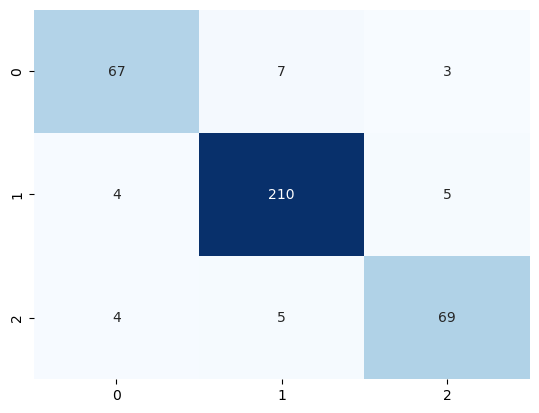

In [176]:
cm = confusion_matrix(target, preds)
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues", cbar=False)

In [177]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)
path= root / "simpleFFN.pth"

In [178]:
torch.save(simple_model,path)

### custom FFN

In [179]:
data

Gender       Age  Sleep_Duration  Quality_of_Sleep  \
0         1 -1.753096       -1.298887                 6   
1         1 -1.637643       -1.173036                 6   
2         1 -1.637643       -1.173036                 6   
3         1 -1.637643       -1.550588                 4   
4         1 -1.637643       -1.550588                 4   
..      ...       ...             ...               ...   
369       0  1.941401        1.218127                 9   
370       0  1.941401        1.092276                 9   
371       0  1.941401        1.218127                 9   
372       0  1.941401        1.218127                 9   
373       0  1.941401        1.218127                 9   

     Physical_Activity_Level  Stress_Level  Heart_Rate  Daily_Steps  \
0                  -0.825418             6    1.654719    -1.298887   
1                   0.039844             8    1.170474    -1.173036   
2                   0.039844             8    1.170474    -1.173036   
3                  -1.402260             8    3.591698    -1.550588   
4                  -1.402260             8    3.591698    -1.550588   
..                       ...           ...         ...          ...   
369                 0.760896             3   -0.524383     1.218127   
370                 0.760896             3   -0.524383     1.092276   
371                 0.760896             3   -0.524383     1.218127   
372                 0.760896             3   -0.524383     1.218127   
373                 0.760896             3   -0.524383     1.218127   

     BP_Systolic  BP_Diastolic  education_research  engineering_technology  \
0      -0.330002     -0.268102                   0                       1   
1      -0.459239     -0.755640                   0                       0   
2      -0.459239     -0.755640                   0                       0   
3       1.479309      0.869486                   0                       0   
4       1.479309      0.869486                   0                       0   
..           ...           ...                 ...                     ...   
369     1.479309      1.682049                   0                       0   
370     1.479309      1.682049                   0                       0   
371     1.479309      1.682049                   0                       0   
372     1.479309      1.682049                   0                       0   
373     1.479309      1.682049                   0                       0   

     healthcare_life_sciences  legal_governance  sales_marketing_commerce  \
0                           0                 0                         0   
1                           1                 0                         0   
2                           1                 0                         0   
3                           0                 0                         1   
4                           0                 0                         1   
..                        ...               ...                       ...   
369                         1                 0                         0   
370                         1                 0                         0   
371                         1                 0                         0   
372                         1                 0                         0   
373                         1                 0                         0   

     obesity  overweight  underweight  Sleep_Disorder  
0          0           1            0               1  
1          0           0            1               1  
2          0           0            1               1  
3          1           0            0               2  
4          1           0            0               2  
..       ...         ...          ...             ...  
369        0           1            0               2  
370        0           1            0               2  
371        0           1            0               2  
372        0         

In [181]:
num_data=data.drop(['Gender','Quality_of_Sleep','Stress_Level' ,'Sleep_Disorder','education_research','engineering_technology','healthcare_life_sciences','legal_governance','sales_marketing_commerce','obesity','overweight','underweight'],axis=1)
num_data

Age  Sleep_Duration  Physical_Activity_Level  Heart_Rate  \
0   -1.753096       -1.298887                -0.825418    1.654719   
1   -1.637643       -1.173036                 0.039844    1.170474   
2   -1.637643       -1.173036                 0.039844    1.170474   
3   -1.637643       -1.550588                -1.402260    3.591698   
4   -1.637643       -1.550588                -1.402260    3.591698   
..        ...             ...                      ...         ...   
369  1.941401        1.218127                 0.760896   -0.524383   
370  1.941401        1.092276                 0.760896   -0.524383   
371  1.941401        1.218127                 0.760896   -0.524383   
372  1.941401        1.218127                 0.760896   -0.524383   
373  1.941401        1.218127                 0.760896   -0.524383   

     Daily_Steps  BP_Systolic  BP_Diastolic  
0      -1.298887    -0.330002     -0.268102  
1      -1.173036    -0.459239     -0.755640  
2      -1.173036    -0.459239     -0.755640  
3      -1.550588     1.479309      0.869486  
4      -1.550588     1.479309      0.869486  
..           ...          ...           ...  
369     1.218127     1.479309      1.682049  
370     1.092276     1.479309      1.682049  
371     1.218127     1.479309      1.682049  
372     1.218127     1.479309      1.682049  
373     1.218127     1.479309      1.682049  

[374 rows x 7 columns]

In [182]:
cata_data=data.drop(['Age','Sleep_Duration','Physical_Activity_Level','BP_Systolic','BP_Diastolic','Heart_Rate','Daily_Steps','Sleep_Disorder'],axis=1)
cata_data

Gender  Quality_of_Sleep  Stress_Level  education_research  \
0         1                 6             6                   0   
1         1                 6             8                   0   
2         1                 6             8                   0   
3         1                 4             8                   0   
4         1                 4             8                   0   
..      ...               ...           ...                 ...   
369       0                 9             3                   0   
370       0                 9             3                   0   
371       0                 9             3                   0   
372       0                 9             3                   0   
373       0                 9             3                   0   

     engineering_technology  healthcare_life_sciences  legal_governance  \
0                         1                         0                 0   
1                         0                         1                 0   
2                         0                         1                 0   
3                         0                         0                 0   
4                         0                         0                 0   
..                      ...                       ...               ...   
369                       0                         1                 0   
370                       0                         1                 0   
371                       0                         1                 0   
372                       0                         1                 0   
373                       0                         1                 0   

     sales_marketing_commerce  obesity  overweight  underweight  
0                           0        0           1            0  
1                           0        0           0            1  
2                           0        0           0            1  
3                           1        1           0            0  
4                           1        1           0            0  
..                        ...      ...         ...          ...  
369                         0        0           1            0  
370                         0        0           1            0  
371                         0        0           1            0  
372                         0        0           1            0  
373                         0        0           1            0  

[374 rows x 11 columns]

In [183]:
target

Sleep_Disorder
0                 1
1                 1
2                 1
3                 2
4                 2
..              ...
369               2
370               2
371               2
372               2
373               2

[374 rows x 1 columns]

In [184]:
class CustomDataset2(Dataset):
    def __init__(self, x1,x2, y):
        self.x1 = torch.tensor(x1.values, dtype=torch.float32)
        self.x2 = torch.tensor(x2.values, dtype=torch.float32)
        self.y = torch.tensor(y.values.squeeze(), dtype=torch.long)

    def __len__(self):
        return len(self.x1)

    def __getitem__(self, idx):
        return self.x1[idx], self.x2[idx], self.y[idx]


In [185]:
train_dataset2 = CustomDataset2(num_data,cata_data,target)

In [186]:
train_dataloader2 = DataLoader(train_dataset2, batch_size=30, shuffle=True)

In [187]:
for i in range(30):
    print(next(iter(train_dataloader2)))

[tensor([[-1.6376, -1.1730,  0.0398,  1.1705, -1.1730, -0.4592, -0.7556],
        [-0.9449, -1.6764, -1.3061,  2.6232, -1.6764,  0.3162,  0.2194],
        [ 0.2096, -0.9213, -0.6812,  0.4441, -0.9213,  0.1869,  0.0569],
        [-1.1758,  0.7147,  0.7609, -0.0401,  0.7147, -1.1054, -0.7556],
        [-1.1758, -1.4247, -1.4023,  0.4441, -1.4247, -0.4592, -0.7556],
        [-1.4067, -0.9213, -1.1619,  1.8968, -0.9213,  0.1869,  0.2194],
        [ 1.3641,  1.7215, -1.4023, -1.2507,  1.7215, -0.4592, -0.7556],
        [-1.4067,  0.8406,  0.7609, -0.0401,  0.8406, -1.1054, -0.7556],
        [ 1.1332, -0.6696, -0.6812,  0.4441, -0.6696,  0.1869,  0.0569],
        [-0.5986,  0.0855,  0.0398, -0.5244,  0.0855, -1.7516, -1.5682],
        [-0.8295,  0.2113,  0.0398, -1.2507,  0.2113, -0.4592, -0.7556],
        [-1.4067,  0.7147,  0.7609, -0.0401,  0.7147, -1.1054, -0.7556],
        [-1.2913, -1.2989, -1.4023,  0.4441, -1.2989, -0.4592, -0.7556],
        [ 0.7869,  1.2181,  1.2416,  3.8338,  1.21

In [196]:
class custom_ffn(nn.Module):
    def __init__(self, num_in=7, cata_in=11, outfeature=3):
        super().__init__()

        # numeric branch
        self.for_num = nn.Sequential(
            nn.Linear(num_in, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU()
        )

        # categorical branch
        self.for_cata = nn.Sequential(
            nn.Linear(cata_in, 48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(48, 16),
            nn.BatchNorm1d(16),
            nn.ReLU()
        )

        # joint head
        self.out_layer = nn.Sequential(
            nn.Linear(32, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(32, outfeature)
        )

    def forward(self, x_num, x_cat):
        n = self.for_num(x_num)
        c = self.for_cata(x_cat)
        x = torch.cat([n, c], dim=1)
        return self.out_layer(x)


In [201]:
custom_model=custom_ffn().to(device)
custom_model

custom_ffn(
  (for_num): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (for_cata): Sequential(
    (0): Linear(in_features=11, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=48, out_features=16, bias=True)
    (5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (out_layer): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()


In [202]:
#loss functioon 
loss_fn=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.Adam(params=custom_model.parameters(),lr=0.0001)

In [203]:
def train2(model, epochs, train_dataloader=train_dataloader2,device=device):
    torch.cuda.manual_seed_all(33)
    for epoch in range(epochs):
        model.train()
        avg_loss = 0.0
        avg_acc  = 0.0

        for step, (x1,x2,y) in enumerate(train_dataloader):

            x1 = x1.to(device)
            x2 = x2.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            logits = model(x1,x2)
            loss = loss_fn(logits, y)

            loss.backward()
            optimizer.step()

            preds = torch.softmax(logits, dim=1).argmax(dim=1)
            acc = accuracy_fn(y, preds)

            avg_loss += loss.item()
            avg_acc  += acc
            #if step % 30==0:
             #   print(f"Epoch {epoch} | Batch {step+1}/{len(train_dataloader)} | Loss {loss.item():.4f} | Acc {acc:.4f}")

        avg_loss /= (step + 1)
        avg_acc  /= (step + 1)

        print(f"Epoch {epoch} summary | Avg Loss {avg_loss:.4f} | Avg Acc {avg_acc:.4f}")


In [204]:
train2(custom_model, 200)

Epoch 0 summary | Avg Loss 1.1152 | Avg Acc 0.3516
Epoch 1 summary | Avg Loss 1.0762 | Avg Acc 0.3740
Epoch 2 summary | Avg Loss 1.0583 | Avg Acc 0.4487
Epoch 3 summary | Avg Loss 1.0075 | Avg Acc 0.5062
Epoch 4 summary | Avg Loss 0.9881 | Avg Acc 0.5667
Epoch 5 summary | Avg Loss 0.9579 | Avg Acc 0.6059
Epoch 6 summary | Avg Loss 0.9210 | Avg Acc 0.6414
Epoch 7 summary | Avg Loss 0.8965 | Avg Acc 0.6788
Epoch 8 summary | Avg Loss 0.8836 | Avg Acc 0.6806
Epoch 9 summary | Avg Loss 0.8608 | Avg Acc 0.7527
Epoch 10 summary | Avg Loss 0.8391 | Avg Acc 0.7333
Epoch 11 summary | Avg Loss 0.8435 | Avg Acc 0.7220
Epoch 12 summary | Avg Loss 0.8138 | Avg Acc 0.7795
Epoch 13 summary | Avg Loss 0.8021 | Avg Acc 0.7861
Epoch 14 summary | Avg Loss 0.7918 | Avg Acc 0.7758
Epoch 15 summary | Avg Loss 0.7751 | Avg Acc 0.7861
Epoch 16 summary | Avg Loss 0.7596 | Avg Acc 0.8048
Epoch 17 summary | Avg Loss 0.7340 | Avg Acc 0.8293
Epoch 18 summary | Avg Loss 0.7216 | Avg Acc 0.8117
Epoch 19 summary | Avg

In [205]:
custom_model.eval()
with torch.inference_mode():
    logits = custom_model(torch.tensor(num_data.values, dtype=torch.float32).to(device),torch.tensor(cata_data.values, dtype=torch.float32).to(device))
    preds = logits.argmax(dim=1).cpu().numpy()

In [206]:
print(accuracy_score(target, preds))

0.93048128342246


<Axes: >

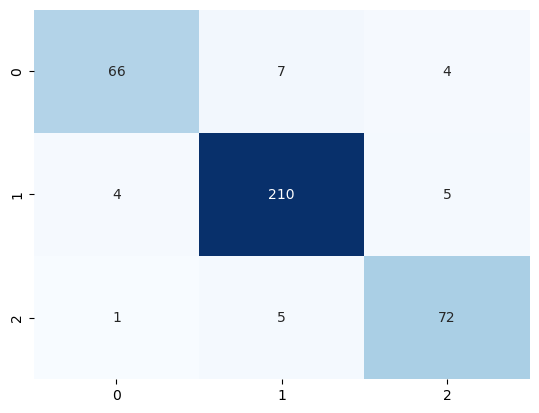

In [207]:
cm = confusion_matrix(target, preds)
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues", cbar=False)

In [208]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)
path= root / "customFFN.pth"

In [209]:
torch.save(custom_model,path)

# prediction functions

### for clasical machinelearning

In [ ]:
data

In [ ]:
data.groupby('Quality_of_Sleep')['Quality_of_Sleep'].count()

In [213]:
def pred_clasical(model_path):
    import numpy as np
    from joblib import load

    model = load(model_path)

    Gender = int(input("Gender (male=1, female=0): "))
    Age = float(input("Age: "))
    Sleep_Duration = float(input("Sleep Duration (hrs): "))
    Quality_of_Sleep = int(input("Quality of Sleep (3–9): "))
    Physical_Activity_Level = float(input("Physical Activity Level (%): "))
    Stress_Level = int(input("Stress Level (1–10): "))
    Heart_Rate = float(input("Heart Rate: "))
    Daily_Steps = int(input("Daily Steps: "))

    BP_Systolic = float(input("BP Systolic: "))
    BP_Diastolic = float(input("BP Diastolic: "))

    print("""
Occupation:
- business_finance_administration
- education_research
- engineering_technology
- healthcare_life_sciences
- legal_governance
- sales_marketing_commerce
""")
    occ = input("Enter occupation: ").strip().lower()

    occ_map = {
        "education_research": 0,
        "engineering_technology": 1,
        "healthcare_life_sciences": 2,
        "legal_governance": 3,
        "sales_marketing_commerce": 4
    }

    occ_vec = np.zeros(5)
    if occ in occ_map:
        occ_vec[occ_map[occ]] = 1

    print("""
BMI:
- normal
- obesity
- overweight
- underweight
""")
    bmi = input("Enter BMI category: ").strip().lower()

    bmi_map = { "obesity": 0,
                "overweight": 1,
                "underweight": 2}

    bmi_vec = np.zeros(3)
    if bmi in bmi_map:
        bmi_vec[bmi_map[bmi]] = 1

    feat = np.array([   Gender,
                        Age,
                        Sleep_Duration,
                        Quality_of_Sleep,
                        Physical_Activity_Level,
                        Stress_Level,
                        Heart_Rate,
                        Daily_Steps,
                        BP_Systolic,
                        BP_Diastolic,
                        *occ_vec,
                        *bmi_vec], dtype=float).reshape(1, -1)

    resdict = {0: "Insomnia",
               1: "No Disease",
               2: "Sleep Apnea"}

    pred = model.predict(feat)[0]
    print("\nPrediction:", resdict[int(pred)], "\n")

    return pred


In [214]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)

In [ ]:
1	28	5.9	4	30	8	85	3000	140.0	90.0	0	0	0	0	1	1	0	0	2

In [229]:
# pread form atucal data
preaad=pred_clasical(model_path=str(root / "SVC.pkl"))
preaad

Gender (male=1, female=0):  1
Age:  28
Sleep Duration (hrs):  5.9
Quality of Sleep (3–9):  4
Physical Activity Level (%):  30
Stress Level (1–10):  8
Heart Rate:  85
Daily Steps:  3000
BP Systolic:  140
BP Diastolic:  90



            Occupation:
            - business_finance_administration
            - education_research
            - engineering_technology
            - healthcare_life_sciences
            - legal_governance
            - sales_marketing_commerce
            


Enter occupation:  sales_marketing_commerce



            BMI:
            - normal
            - obesity
            - overweight
            - underweight
            


Enter BMI category:  obesity



Prediction: Sleep Apnea 



np.int64(2)

### for simplenetwork

In [240]:
class simple_ffn(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(64, output_features)
        )

    def forward(self, x):
        return self.net(x)


In [252]:
def pred_clasical(model_path):
    import numpy as np
    from joblib import load
    
    model = load(model_path)
    
    Gender=int(input("enter Gender for male '1' & felmale 0 : "))
    Age=float(input("enter Age : "))
    
    print("\nOccupation_Categorys->\n",
          "business_finance_administration: 0 \n",
         "education_research: 1 \n",
         "engineering_technology: 2 \n",
         "healthcare_life_sciences: 3 \n",
         "legal_governance: 4 \n",
         "sales_marketing_commerce: 5 \n")
    
    Occupation=int(input("enter Occupation : "))
    Sleep_Duration=float(input("enter Sleep_Duration  : "))
    Quality_of_Sleep=int(input("enter Quality_of_Sleep form 3 to 9 : "))
    Physical_Activity_Level=float(input("enter Physical_Activity_Level % form 30 to 100 : "))
    Stress_Level=int(input("enter Stress_Level form 1 to 10 : "))

    print("\nBMI_Categorys->\n",
          "normal weight: 0 \n",
          "obesity: 1 \n",
          "overweight: 2 \n",
          "underweight: 3 \n")
 
    BMI_Category=int(input("enter BMI_Category : "))
    
    Blood_Pressure=float(input("enter avg Blood_Pressure : "))
    Heart_Rate=float(input("enter Heart_Rate : "))
    Daily_Steps=int(input("enter Daily_Steps : "))
    
    feat = np.zeros(11)

    feat[0] = Gender
    feat[1] = Age
    feat[2] = Occupation
    feat[3] = Sleep_Duration
    feat[4] = Quality_of_Sleep
    feat[5] = Physical_Activity_Level
    feat[6] = Stress_Level
    feat[7] = BMI_Category
    feat[8] = Blood_Pressure
    feat[9] = Heart_Rate
    feat[10] = Daily_Steps
    
    feat = feat.reshape(1, -1)
    
    resdict={0: 'Insomnia',1: 'No_desease' , 2:"Sleep Apnea"}
    
    prediction = model.predict(feat)
    if prediction<0:
        prediction=0
    print("\n","prediction: ", resdict[ int(prediction[0])],"\n",)
    return prediction


In [253]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)
path= root / 'simpleFFN.pth'

In [254]:
model = torch.load(path, map_location=device, weights_only=False)

In [255]:
pred_torch(model=model)

Gender (male=1, female=0):  1
Age:  28
Sleep Duration (hrs):  5.9
Quality of Sleep (3–9):  4
Physical Activity Level:  30
Stress Level (1–10):  8
Heart Rate:  85
Daily Steps:  3000
BP Systolic:  140
BP Diastolic:  90



Occupation:
business_finance_administration
education_research
engineering_technology
healthcare_life_sciences
legal_governance
sales_marketing_commerce



Enter occupation:  sales_marketing_commerce



BMI:
normal
obesity
overweight
underweight



Enter BMI category:  obesity



Prediction: No Disease 



1

### for coustom network

In [268]:
class custom_ffn(nn.Module):
    def __init__(self, num_in=7, cata_in=11, outfeature=3):
        super().__init__()

        # numeric branch
        self.for_num = nn.Sequential(
            nn.Linear(num_in, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU()
        )

        # categorical branch
        self.for_cata = nn.Sequential(
            nn.Linear(cata_in, 48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(48, 16),
            nn.BatchNorm1d(16),
            nn.ReLU()
        )

        # joint head
        self.out_layer = nn.Sequential(
            nn.Linear(32, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(32, outfeature)
        )

    def forward(self, x_num, x_cat):
        n = self.for_num(x_num)
        c = self.for_cata(x_cat)
        x = torch.cat([n, c], dim=1)
        return self.out_layer(x)


In [269]:
def pred_torch_custom(model, device="cpu"):
    import torch
    import numpy as np

    Age = float(input("Age : "))
    Sleep_Duration = float(input("Sleep Duration : "))
    Physical_Activity_Level = float(input("Physical Activity Level : "))
    Heart_Rate = float(input("Heart Rate : "))
    Daily_Steps = float(input("Daily Steps : "))
    BP_Systolic = float(input("BP Systolic : "))
    BP_Diastolic = float(input("BP Diastolic : "))

    x_num = np.array([
        Age,
        Sleep_Duration,
        Physical_Activity_Level,
        Heart_Rate,
        Daily_Steps,
        BP_Systolic,
        BP_Diastolic
    ], dtype=np.float32)

    Gender = int(input("Gender (male=1, female=0): "))
    Quality_of_Sleep = int(input("Quality of Sleep (3–9): "))
    Stress_Level = int(input("Stress Level (1–10): "))

    print("""
Occupation:
business_finance_administration
education_research
engineering_technology
healthcare_life_sciences
legal_governance
sales_marketing_commerce
""")
    occ = input("Enter occupation: ").strip().lower()

    occ_map = {
        "education_research": 0,
        "engineering_technology": 1,
        "healthcare_life_sciences": 2,
        "legal_governance": 3,
        "sales_marketing_commerce": 4
    }

    occ_vec = np.zeros(5)
    if occ in occ_map:
        occ_vec[occ_map[occ]] = 1

    print("""
BMI:
normal
obesity
overweight
underweight
""")
    bmi = input("Enter BMI category: ").strip().lower()

    bmi_map = {
        "obesity": 0,
        "overweight": 1,
        "underweight": 2
    }

    bmi_vec = np.zeros(3)
    if bmi in bmi_map:
        bmi_vec[bmi_map[bmi]] = 1

    x_cat = np.array([
        Gender,
        Quality_of_Sleep,
        Stress_Level,
        *occ_vec,
        *bmi_vec
    ], dtype=np.float32)

    x_num = torch.tensor(x_num).unsqueeze(0).to(device)
    x_cat = torch.tensor(x_cat).unsqueeze(0).to(device)

    with torch.no_grad():
        logits = model(x_num, x_cat)
        pred = torch.argmax(logits, dim=1).item()

    resdict = {
        0: "Insomnia",
        1: "No Disease",
        2: "Sleep Apnea"
    }

    print("\nPrediction:", resdict[pred], "\n")
    return pred


In [263]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)
path= root / 'customFFN.pth'

In [264]:
model = torch.load(path, map_location=device, weights_only=False)

In [271]:
model.to('cpu')

custom_ffn(
  (for_num): Sequential(
    (0): Linear(in_features=7, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (for_cata): Sequential(
    (0): Linear(in_features=11, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=48, out_features=16, bias=True)
    (5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (out_layer): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()


In [ ]:
1	28	5.9	4	30	8	85	3000	140.0	90.0	0	0	0	0	1	1	0	0	2

In [272]:
pred_torch_custom(model=model)

Age :  28
Sleep Duration :  5
Physical Activity Level :  53
Heart Rate :  6
Daily Steps :  8
BP Systolic :  5
BP Diastolic :  2
Gender (male=1, female=0):  1
Quality of Sleep (3–9):  6
Stress Level (1–10):  2



Occupation:
business_finance_administration
education_research
engineering_technology
healthcare_life_sciences
legal_governance
sales_marketing_commerce



Enter occupation:  sales_marketing_commerce



BMI:
normal
obesity
overweight
underweight



Enter BMI category:  overweight



Prediction: No Disease 



1